## **MeerKLASS-SSINS  Algorithm Analysis Notebook**

The following notebook serves as a summary of the progress made to date in the MeerKLASS Radio Frequency Interference (RFI) detection project using the SSINS (Sky-Subtracted Incoherent Noise Spectra) framework.


The notebook evalutes and compares the sky-subtraction methods that we have used to remove the sky from the data.  In this notebook we will evalute wether the sky removal methods has sufficiently removed the astrophysical sky from our data, we will also perform statistical checks on the residual data, this will allow us to understand the distribution of the residual data. This notebook also has documented the complete performance of the SSINS algorithm on ata from observation block 1630519596 and for completeness we have run the algorithm on both methods and deduced with the 4-channel dithering method we achieve better sky removal, noise reduction and hence boost of sensitity to the underlying faint interference that we are interested in detecting. 



### **Table of Contents**


[SSINS: Radio Frequency Interference (RFI) Flagging Software ](#SSINS)

[Level 1 SSINS Algorithm Application](#1)
  * [Sky - Subtraction Method : ABBA](#section1)
  * [Noise Spectrum : ABBA](#section1.2)
    * [RMS Receiver Statistics](#section1.3)
    * [Data Distributions](#section1.3.1)|
  * [Z Score Distribution](#section1.4)
    
 * [Sky - Subtraction Method : 2 Channel Dithering](#section1.5)
 * [Noise Spectrum and Z Score Distribution : 2 Channel Dithering](#section1.6)

* [Level 4 SSINS Algorithm Application](#Level4)
  
[Bandpass Plots- With SSINS Flags](#section.bp)    


# **1. SSINS: Radio Frequency Interference (RFI) Flagging Software** <a class="anchor" id="SSINS"></a>

**SSINS** (**S**ky-**S**ubtracted **I**ncoherent **N**oise **S**pectra) is an RFI flagging software that was developed for the MWA (Murchison Widefield Array) Radio Interferometer. The software was created such that the SSINS algorithmn can be suitably adjusted and applied to any other radio telescope, on a premise that your goal is to address the challenge of detecting and removing faint RFI in radio telescope observations. Faint RFI lies below the single baseline sensitivity of an array and in the case of single-dish observing systems faint RFI will lie below the noise measurement of the dish. Due to magnitude level of fainter RFI these conaminants often go undetected by standard RFI Flaggers, such as AOFlagger. 

In this work we will apply the SSINS algorithm to MeerKLASS 2021 L-band data, in particular the raw, time-ordered autocorrelation data. The first level of data reduction in the meerklass pipeline involves the flagging of strong RFI spikes in the data at the raw time ordered data level. The first round of flagging uses SEEK (Signal Extraction and Emission Kartographer), which is an RFI flagging software. The SEEK RFI flagger is based of the tresholding algorithm. The raw time ordered data is broken up into 6 groups and the flagger is applied to each group seperately in 2 steps, the first step the flagger is applied to the entire frequncy range of the data to flag the strong RFI from statelite and communications and the second flagging process is applied to the science targert freqeuency bands only. 
Our current analysis steps invloves applying the  SSINS methods after the flagging of strong RFI, i.e we apply the algorithm to the raw data with level 1 masks applied on the data,  this is done because strong RFI will result in the skewing of the data mean and the residual data distribution, and will affect SSINS ability to detect weaker RFI emissions. 

We apply the following stages of the SSINS Algorithm to the data:

1. **S**ky-Subraction
   
*  ABBA (4 Neighbouring Time Channel Differencing)
* 2 Neighbouring Time Channel Differencing
   
3. **IN**coherent Averaging
   
5. Mean Subraction (z-score calculation)



In [17]:
# Parameters
Block = '1630519596'
pol = 'h'

In [18]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath('.'))
import mkssins
from mkssins import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In the next cell we define the observation block and path to the specific level masks we are working with. In this case we using observation block

In [19]:
fname = Block
path = '/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/'


In [20]:
#just checking the mkssins.py module

ants = ants_checked_L1(fname, path, pol)
for ant in ants:
    print(ant)
 

m000
m001
m002
m003
m004
m005
m006
m007
m008
m009
m010
m011
m012
m013
m014
m015
m016
m017
m018
m019
m020
m021
m023
m024
m025
m027
m029
m030
m031
m032
m033
m035
m036
m037
m038
m039
m040
m041
m042
m043
m044
m045
m046
m047
m048
m049
m050
m051
m052
m053
m054
m055
m056
m057
m058
m059
m061
m062
m063


 In the next cell we  will loop over the ants in the list of antennas with masks and access the visData function from mkssins.py, we are storing the visibility products and the noise_diodes as seperate dictionaries, with 'ant' being the key for the values in the respective dictionaries. Also note we can add flags (SARAO Prior flags as well using the same approach)


In [21]:
# check if there is data, if there is no data raise exception and cancel the operation

In [ ]:
%time

raw_vis_dict = {}
nd_flags_dict ={}
ps_flags_dict={}

for ant in ants:
    vis,nd_s0, ps = mkssins.visData(fname, ant , pol) # replace ant[0] and remove loop for extracting the antenna as a string from the list
    raw_vis_dict[ant] = vis
    nd_flags_dict[ant] = nd_s0
    ps_flags_dict[ant] = ps
    
    

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m000h' 'm000h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m001h' 'm001h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m002h' 'm002h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m003h' 'm003h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m004h' 'm004h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m005h' 'm005h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m006h' 'm006h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m007h' 'm007h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m008h' 'm008h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m009h' 'm009h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m010h' 'm010h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m011h' 'm011h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


In [251]:
raw_vis_dict.keys()  #checking the  raw vis  dictionary

dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

In [252]:
nd_flags_dict.keys() #checking the noise diode flags  dictionary

dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

In [253]:
ps_flags_dict.keys()

dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

 Similary in the next cell we can create a dictionary for the mask of the flags from the Level 1 folder. We use the try/except method to check for _mask2 / _mask flag masks for each receiver.

In [254]:
n_ants = len(ants)
print(f'Number of ants in  observation {Block} is : {n_ants}')

Number of ants in  observation 1638386189 is : 38


In [255]:
for ant in ants_checked_L1(fname, path, pol):
    print(ant)

m000
m002
m005
m008
m009
m010
m011
m012
m016
m017
m018
m019
m021
m022
m025
m028
m029
m032
m038
m039
m040
m042
m043
m044
m045
m046
m047
m048
m049
m050
m051
m052
m054
m056
m058
m059
m061
m062


In [ ]:
len

# Level 1 SSINS Algorithm Application <a id="1"></a>

In [ ]:
# We have to change the checking of the available masks to be done over the ants_checked_l1 which was the function that checked is there are masks available for the dishes in the observation block.

In [256]:

l1_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/')
for dish in ants:
    
    try:
        with open(mask_dir / f'{fname}_{dish}_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print (f'mask2 loaded for dish {dish}')
    except(Exception):
        with open(mask_dir / f'{fname}_{dish}_mask', 'rb')as f:
            d3 = pickle.load(f)
            print (f'mask loaded for dish {dish}')
    mask_flags=d3['mask']
    l1_flags_dict[dish]  = mask_flags
    

    
   
    #print(dish)

mask loaded for dish m000
mask loaded for dish m002
mask loaded for dish m005
mask loaded for dish m008
mask2 loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask2 loaded for dish m012
mask loaded for dish m016
mask loaded for dish m017
mask loaded for dish m018
mask2 loaded for dish m019
mask loaded for dish m021
mask loaded for dish m022
mask loaded for dish m025
mask loaded for dish m028
mask2 loaded for dish m029
mask2 loaded for dish m032
mask2 loaded for dish m038
mask loaded for dish m039
mask loaded for dish m040
mask2 loaded for dish m042
mask loaded for dish m043
mask loaded for dish m044
mask2 loaded for dish m045
mask loaded for dish m046
mask2 loaded for dish m047
mask2 loaded for dish m048
mask2 loaded for dish m049
mask2 loaded for dish m050
mask2 loaded for dish m051
mask2 loaded for dish m052
mask loaded for dish m054
mask2 loaded for dish m056
mask loaded for dish m058
mask loaded for dish m059
mask2 loaded for dish m061
mask loaded for dish m

In [257]:
l1_flags_dict.keys() #checking level1 flags dictionary

dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

In [258]:
from collections import defaultdict #stackexchange suggestion

l1_flags = l1_flags_dict
raw_vis = raw_vis_dict
nd_flags = nd_flags_dict
ps_flags = ps_flags_dict

dd = defaultdict(list)

for d in (l1_flags, raw_vis, nd_flags, ps_flags): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[528.61346436,  74.21876526,  74.35679626, ...,   0.        ,
          0.        ,   0.        ],
       [528.24810791,  74.31324768,  74.55072784, ...,   0.        ,
          0.        ,   0.        ],
       [528.9319458 ,  74.41029358,  74.43522644, ...,  52.75299835,
         53.1023407 ,  53.74732971],
       ...,
       [695.08996582,  83.31297302,  83.23464966, ...,  41.39805222,
         41.6807518 ,  42.21580124],
       [696.70037842,  83.36087036,  83.24454498, ...,  41.3392067 ,
         41.65433502,  42.21823502],
       [695.96661377,  83.55278015,  83.04295349, ...,  41.44528961,
 

In [259]:
dd.keys()

dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

In [260]:
dd.items()

dict_items([('m000', [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[528.61346436,  74.21876526,  74.35679626, ...,   0.        ,
          0.        ,   0.        ],
       [528.24810791,  74.31324768,  74.55072784, ...,   0.        ,
          0.        ,   0.        ],
       [528.9319458 ,  74.41029358,  74.43522644, ...,  52.75299835,
         53.1023407 ,  53.74732971],
       ...,
       [695.08996582,  83.31297302,  83.23464966, ...,  41.39805222,
         41.6807518 ,  42.21580124],
       [696.70037842,  83.36087036,  83.24454498, ...,  41.3392067 ,
         41.65433502,  42.21823502],
       [695.96661377,  83.55278015,  83.04295349, ...,  41.44528961,
         41.56317

In [281]:
masked_vis_l1_dict = {}

for dish, (mask_flags, vis , nd_s0, ps_flags) in dd.items():
    """print(f'shape pipeline flags: {mask_flags.shape}')
    print(f'shape visibility: {vis.shape}')
    print(f'shape ps flags: {len(ps_flags)}')
    print(f'shape ps flags: {len(nd_s0)}')"""
    """if mask_flags.shape != vis.shape: 
        vis_reshaped = reshape_array(data=vis, data_to_match=mask_flags.shape) 
        masked_vis = MaskedArrayVisibilityFlags(vis_reshaped, pipeline_flags=mask_flags, nd_s0=nd_s0, pointsource_flags=ps_flags)
    else:"""
    masked_vis = MaskedArrayVisibilityFlags(vis, pipeline_flags=mask_flags, nd_s0=nd_s0, pointsource_flags=ps_flags)
    masked_vis_l1_dict[dish] = masked_vis

In [282]:
masked_vis_l1_dict.keys()


dict_keys(['m000', 'm002', 'm005', 'm008', 'm009', 'm010', 'm011', 'm012', 'm016', 'm017', 'm018', 'm019', 'm021', 'm022', 'm025', 'm028', 'm029', 'm032', 'm038', 'm039', 'm040', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm054', 'm056', 'm058', 'm059', 'm061', 'm062'])

In [270]:
for ant_value in masked_vis_l1_dict.keys():
    print(ant_value)

m000
m002
m005
m008
m009
m010
m011
m012
m016
m017
m018
m019
m021
m022
m025
m028
m029
m032
m038
m039
m040
m042
m043
m044
m045
m046
m047
m048
m049
m050
m051
m052
m054
m056
m058
m059
m061
m062


#### Waterfall Panel of the Raw Visibilities

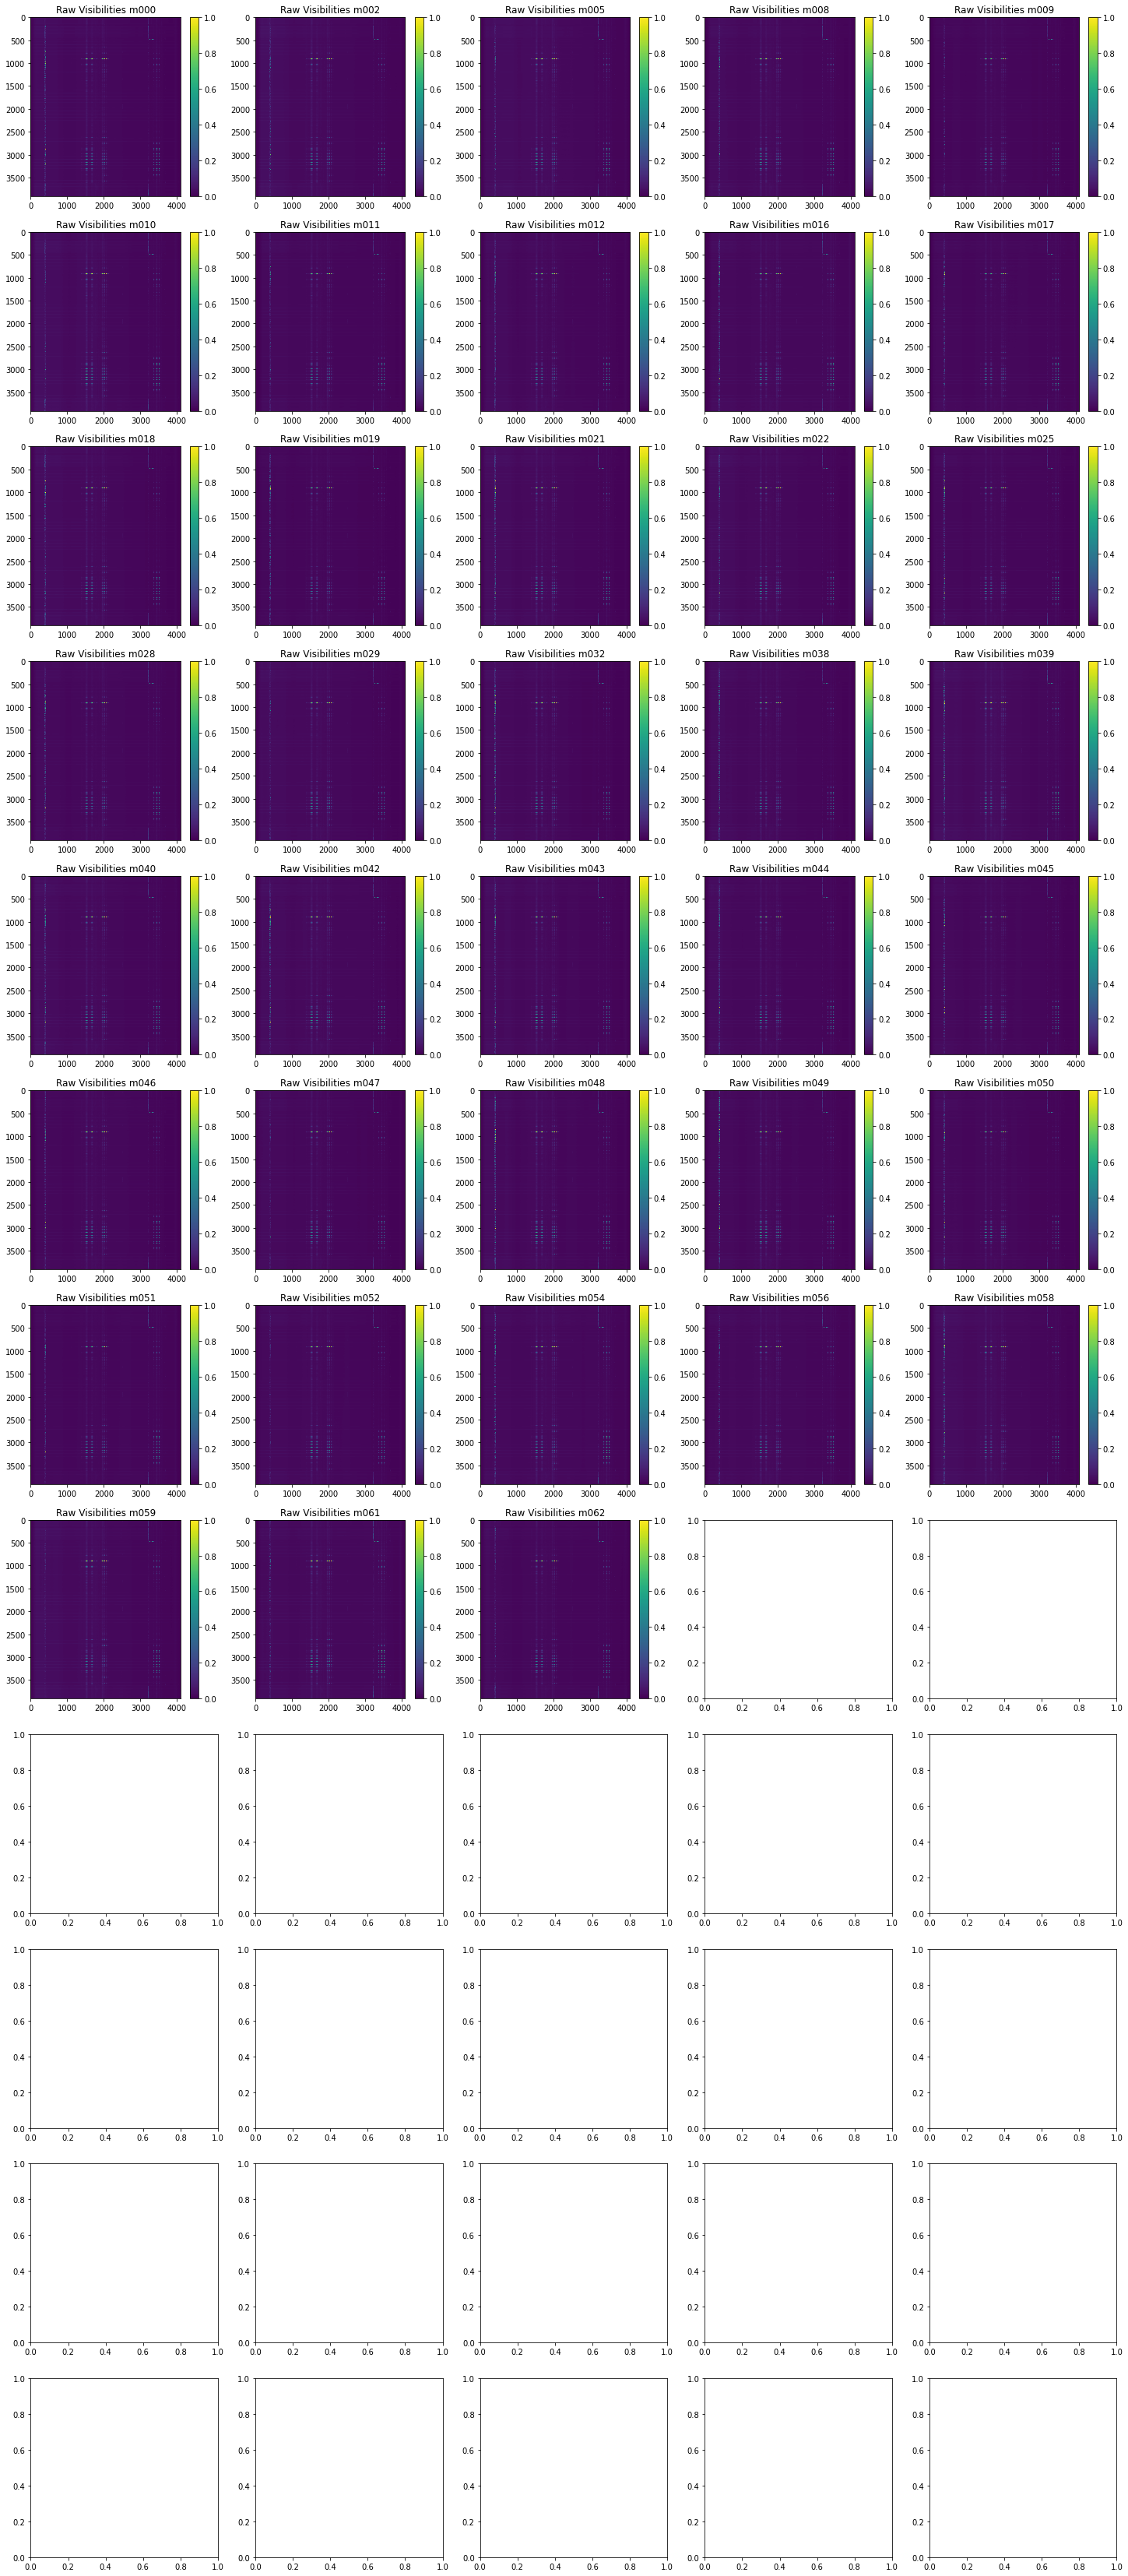

In [271]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 12 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(raw_vis_dict[ant_value], ax=ax, Title=f'Raw Visibilities {ant_value}', interpolation='nearest') for ant_value, ax in zip(raw_vis_dict, axes.flat) if ant_value in raw_vis_dict]
plt.show()

   

#### Waterfall Panel of the Raw Visibilities with Level 1 masks applied

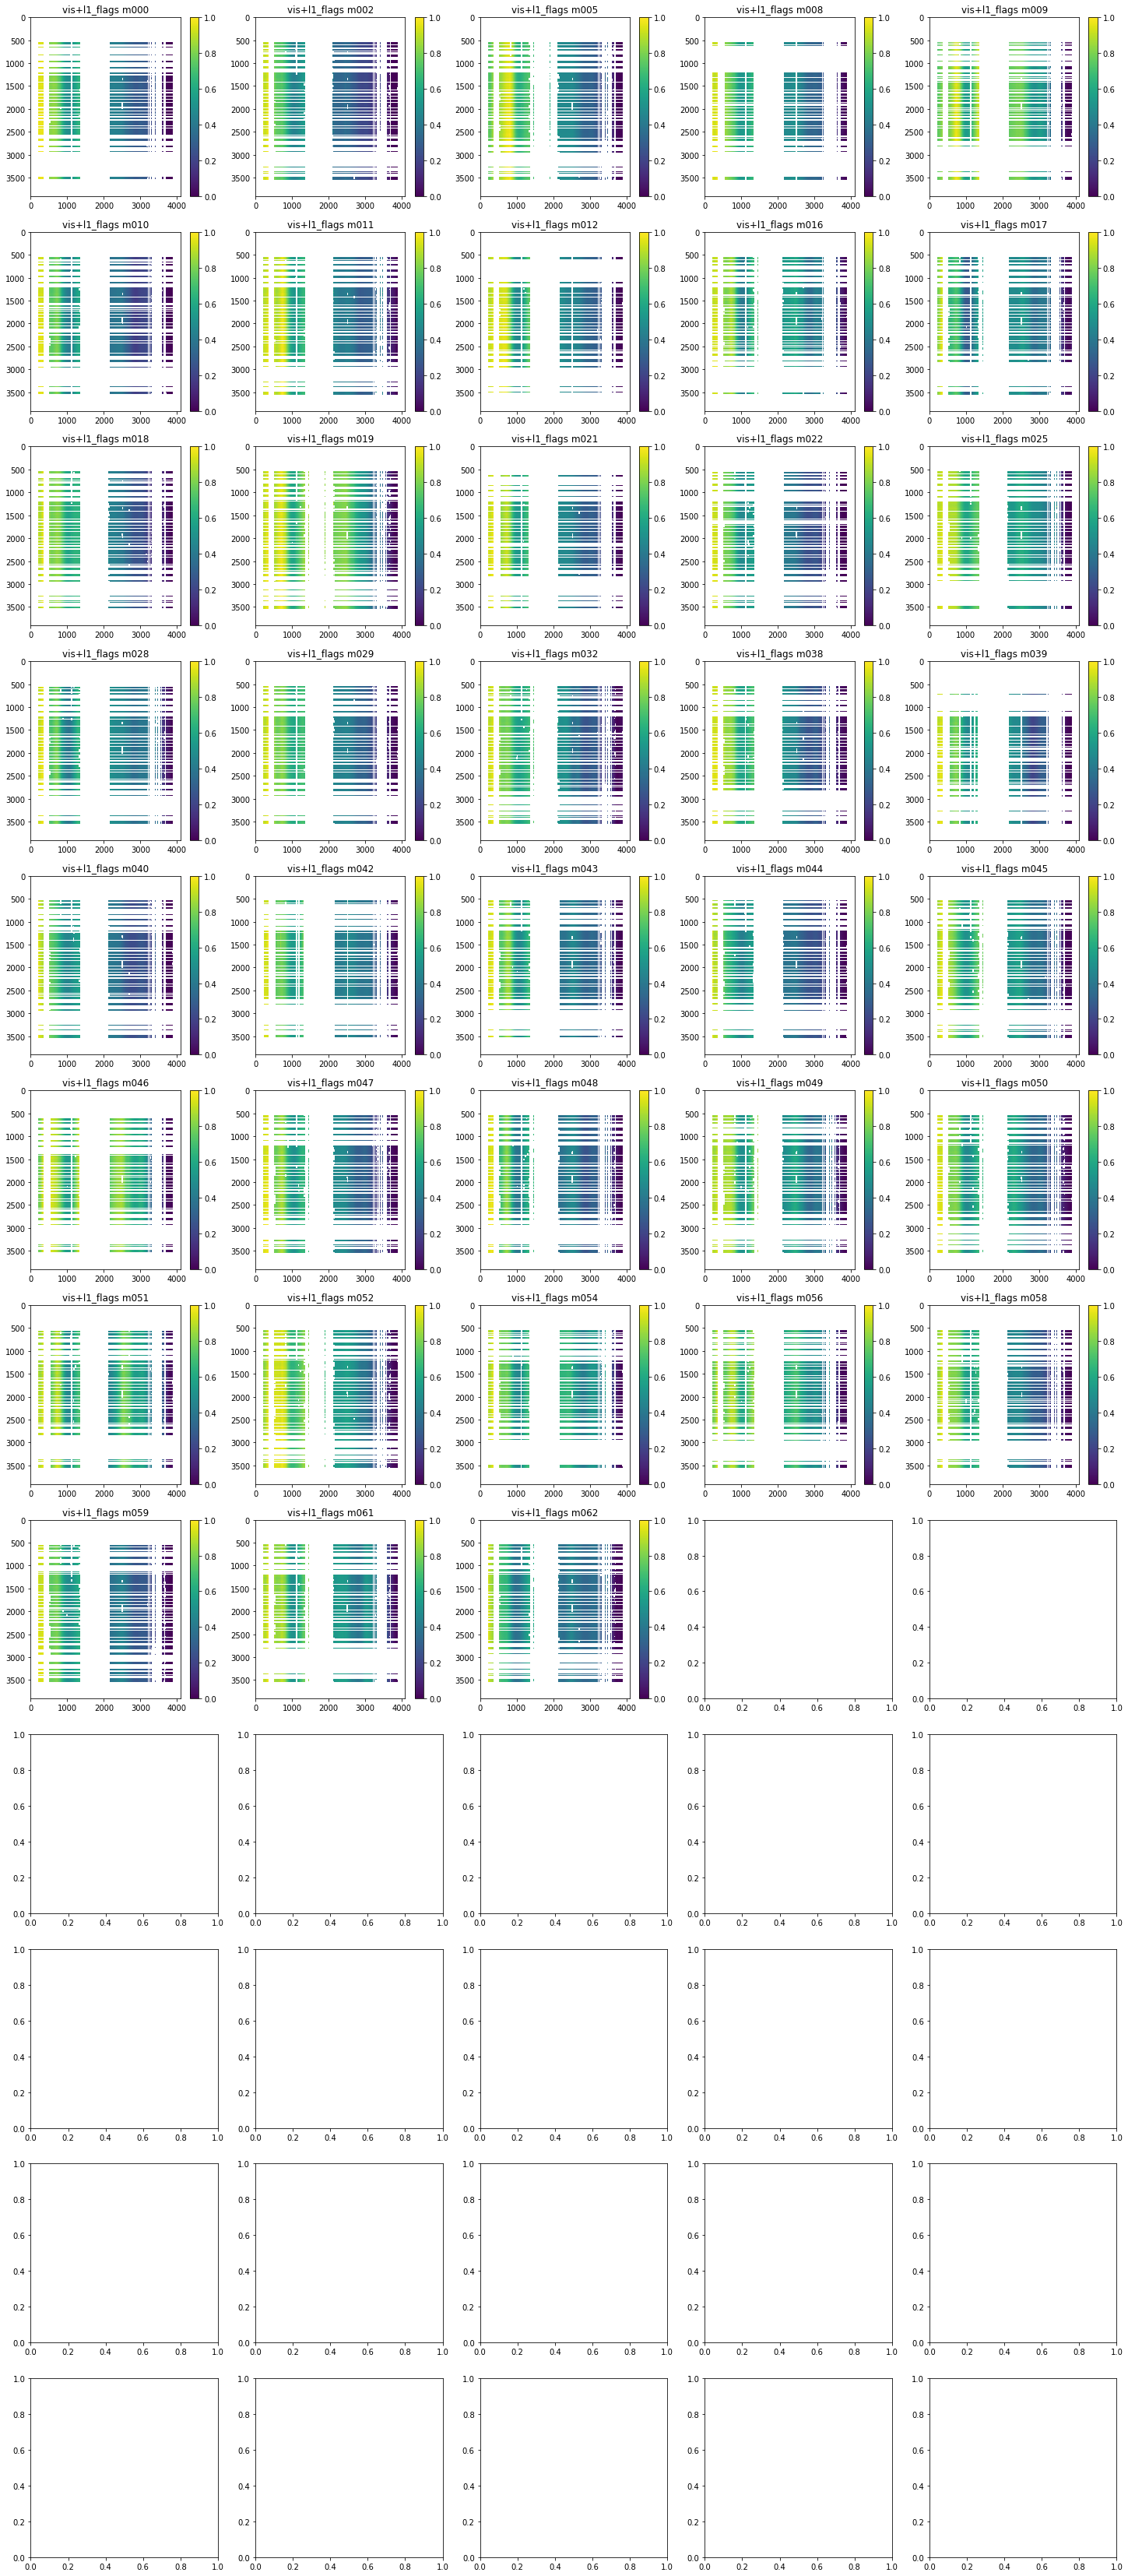

In [283]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 12 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(masked_vis_l1_dict[ant_value].filled(), ax=ax, Title=f'vis+l1_flags {ant_value}', interpolation='nearest') for ant_value, ax in zip(masked_vis_l1_dict, axes.flat) if ant_value in masked_vis_l1_dict]
plt.show()

   

## **Sky - Subtraction Method : ABBA**  <a class="anchor" id="section1"></a>


Sky-Subtraction involves removing the bright astrophysical sky signal from observational data. This is done to promote sensitivity of the remaining/underlying signal of the data.By subtracting the bright sky signal we expect the residual components of the time ordered data to comprise of a slowly varying noise component and lowlying RFI. Note at this point the sky would be subtracted, and the residual distribution is noise and RFI. 

The distribution of the sky-subtracted amplitudes (noise+RFI) would have a non-zero mean distribution like the following illustration:



In this Section we will apply the ABBA method, which involves subtracting subsequent time-channels in the array, in this method our differencing is done over 4 channels in the TOD array.


In [342]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_l1_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

ss_l1 = np.stack(list(abba_ss_dict.values()), axis=0)

In [343]:
SS_all_ants = ss_l1
SS_all_ants[:, 1010, 3000]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

### Bandpass plots of the ABBA Sky-Subtraction for each Receiver

The purpose of these bandpass plots is to help us identify badly behaved recievers that should be excluded from sky-subtraction spectrums

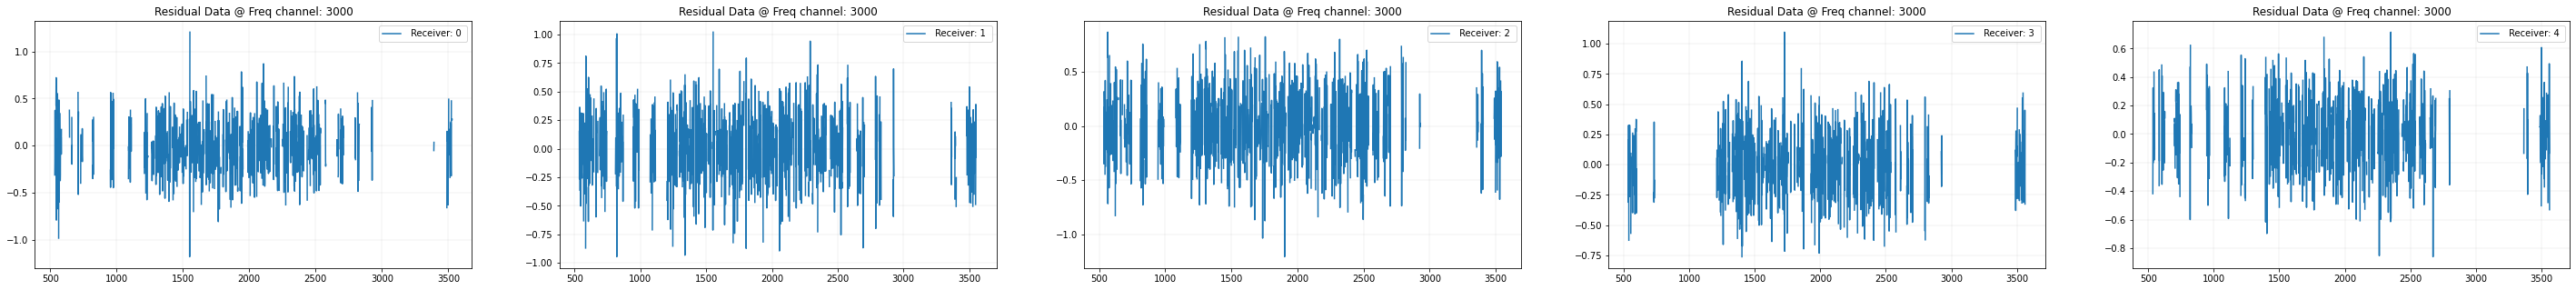

In [288]:
#Note this one is inspecting at one frequency channel (residual data plot)

rows = 1 #2
columns = 5
ant_trunc = ants[0:5]
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(SS_all_ants[i, :, 3000], ylim= (-2,2), label= f" Receiver: {i} ", Title='Residual Data @ Freq channel: 3000', ax=ax) for i, ax in zip(range(0, len(ant_trunc)), axes.flat)]
plt.show()

Bandpass plots for each receiver sky-subtraction, we want to check for the those strange spikes we see in the all antenna average, if its attributed to the averaging of the spectrums.

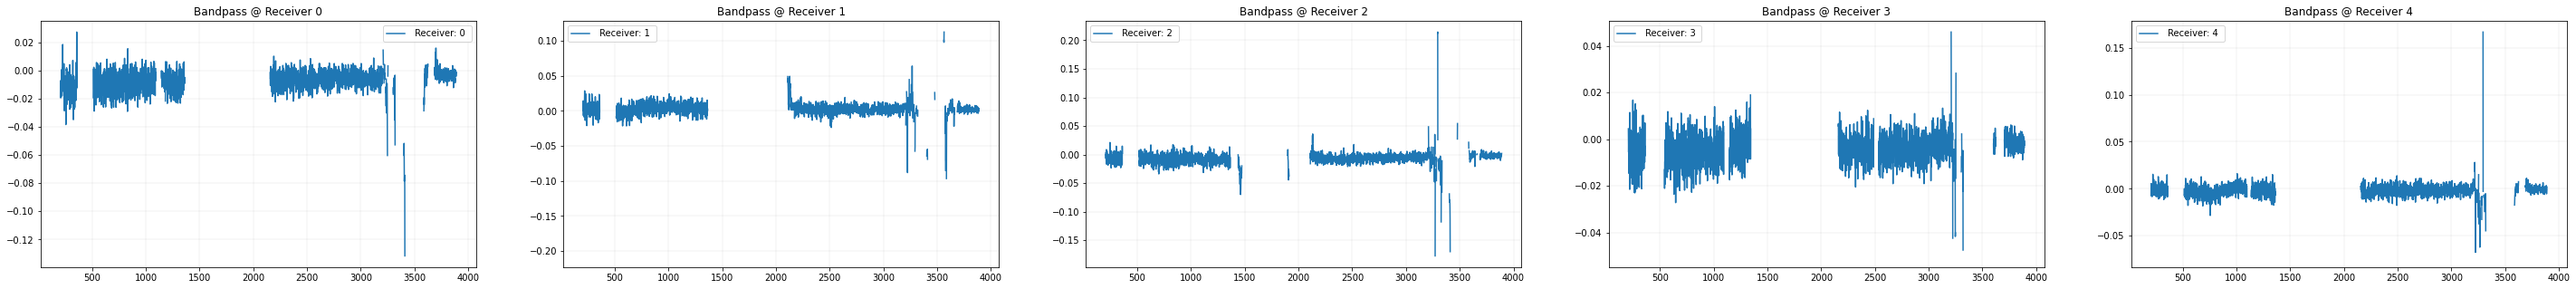

In [289]:
# Note this is the  ABBA SS Bandpass at each receiver
rows = 1 
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(np.nanmean(SS_all_ants[i, :, :], axis=0), ylim= (-0.5,0.5), label= f" Receiver: {i} ", Title= f'Bandpass @ Receiver {i}', ax=ax) for i, ax in zip(range(0, len(ant_trunc)), axes.flat)]
plt.show()



### Waterfall plots of the ABBA Sky-Subtraction for each Receiver

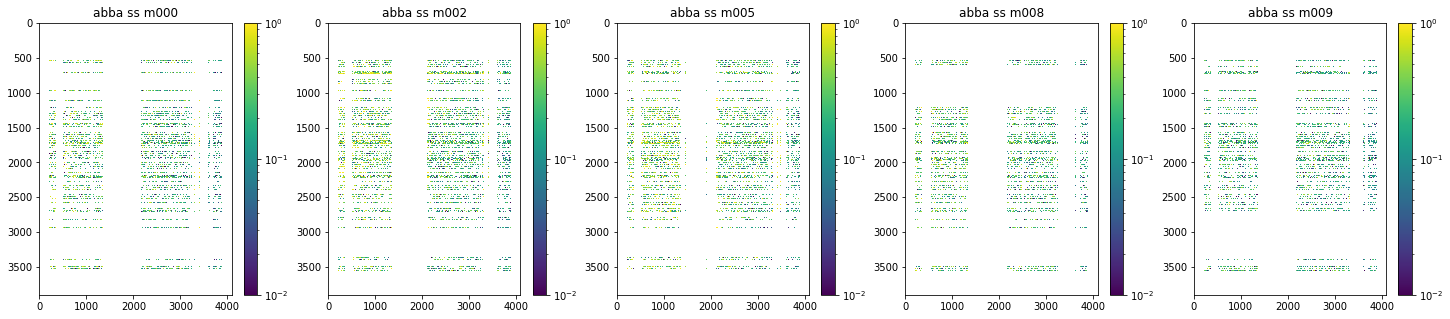

In [290]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=0.01, vmax=1)
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(abba_ss_dict[ant_value], ax=ax, Title=f'abba ss {ant_value}', interpolation='nearest', norm=norm) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
plt.show()

   

## **1.3. Noise Spectrum : ABBA**  <a class="anchor" id="section1.2"></a>

At this stage we have done sky subtractions for each receiver, the next step of the SSINS algorithm is  avergaing over all receivers in the observation block and taking the absolute value of the sky-subtraction amplitudes. By taking the absolute value of the sky-subtraction amplitudes we discard the sky-subtracted visbility phase, and we get incoherent noise amplitudes which would have a folded gaussain distribution

### Bandpass plot of the Antenna Averaged ABBA Sky-Subtraction (SSINS)



No handles with labels found to put in legend.


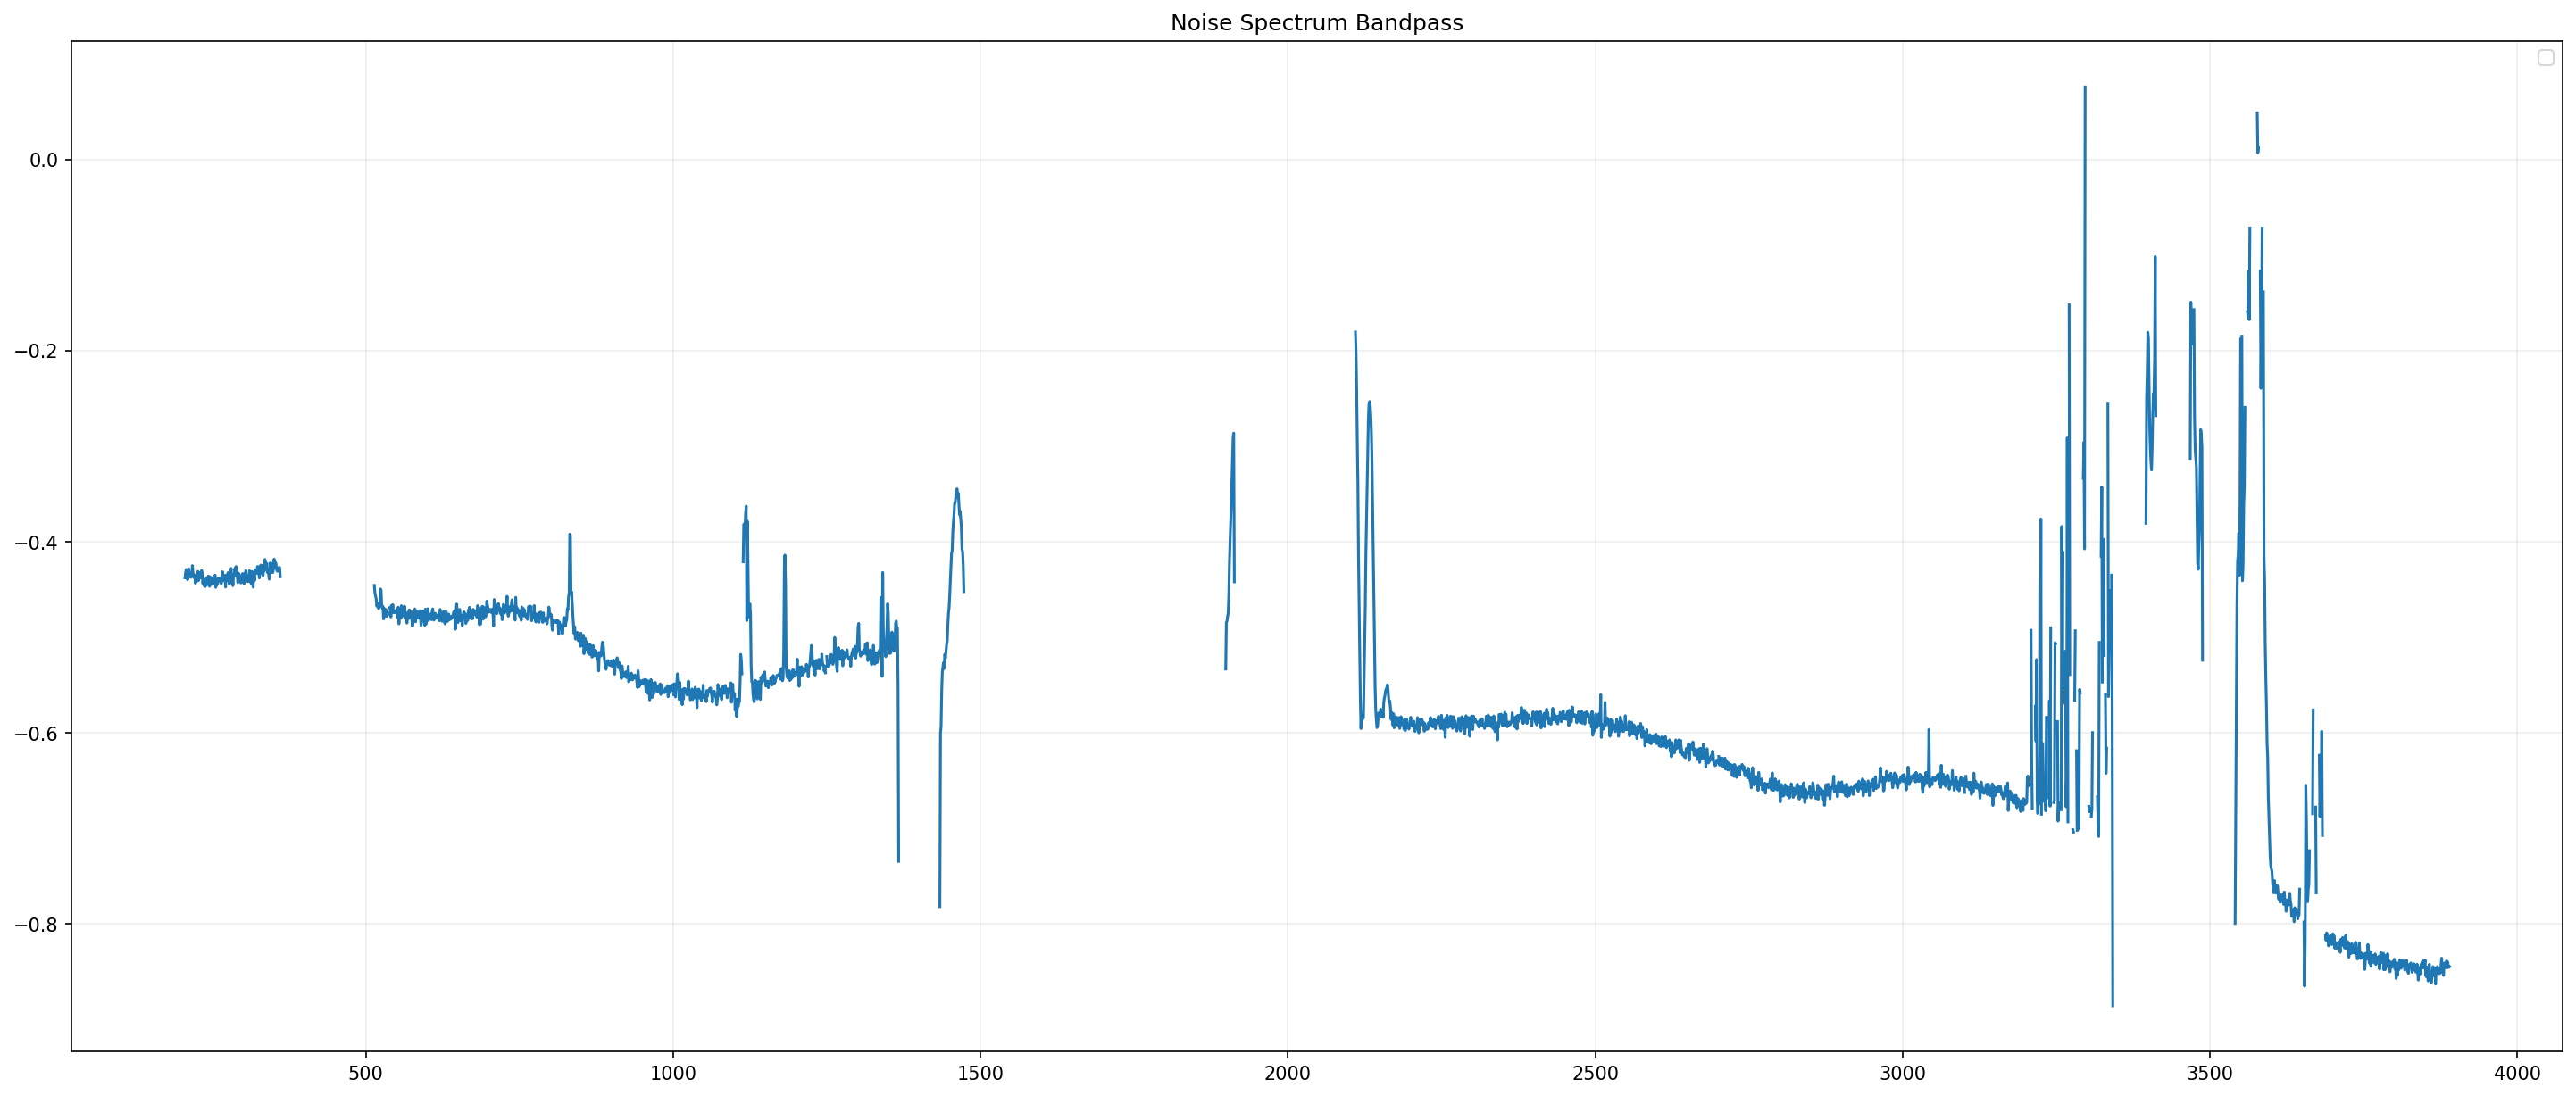

In [344]:
figure, ax = plt.subplots(1, 1 , figsize=(24, 10), dpi=150)
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot(np.nanmean(np.log10(AbbaAllAnts), axis=0), Title='Noise Spectrum Bandpass', ax=ax)

[None, None, None, None, None]

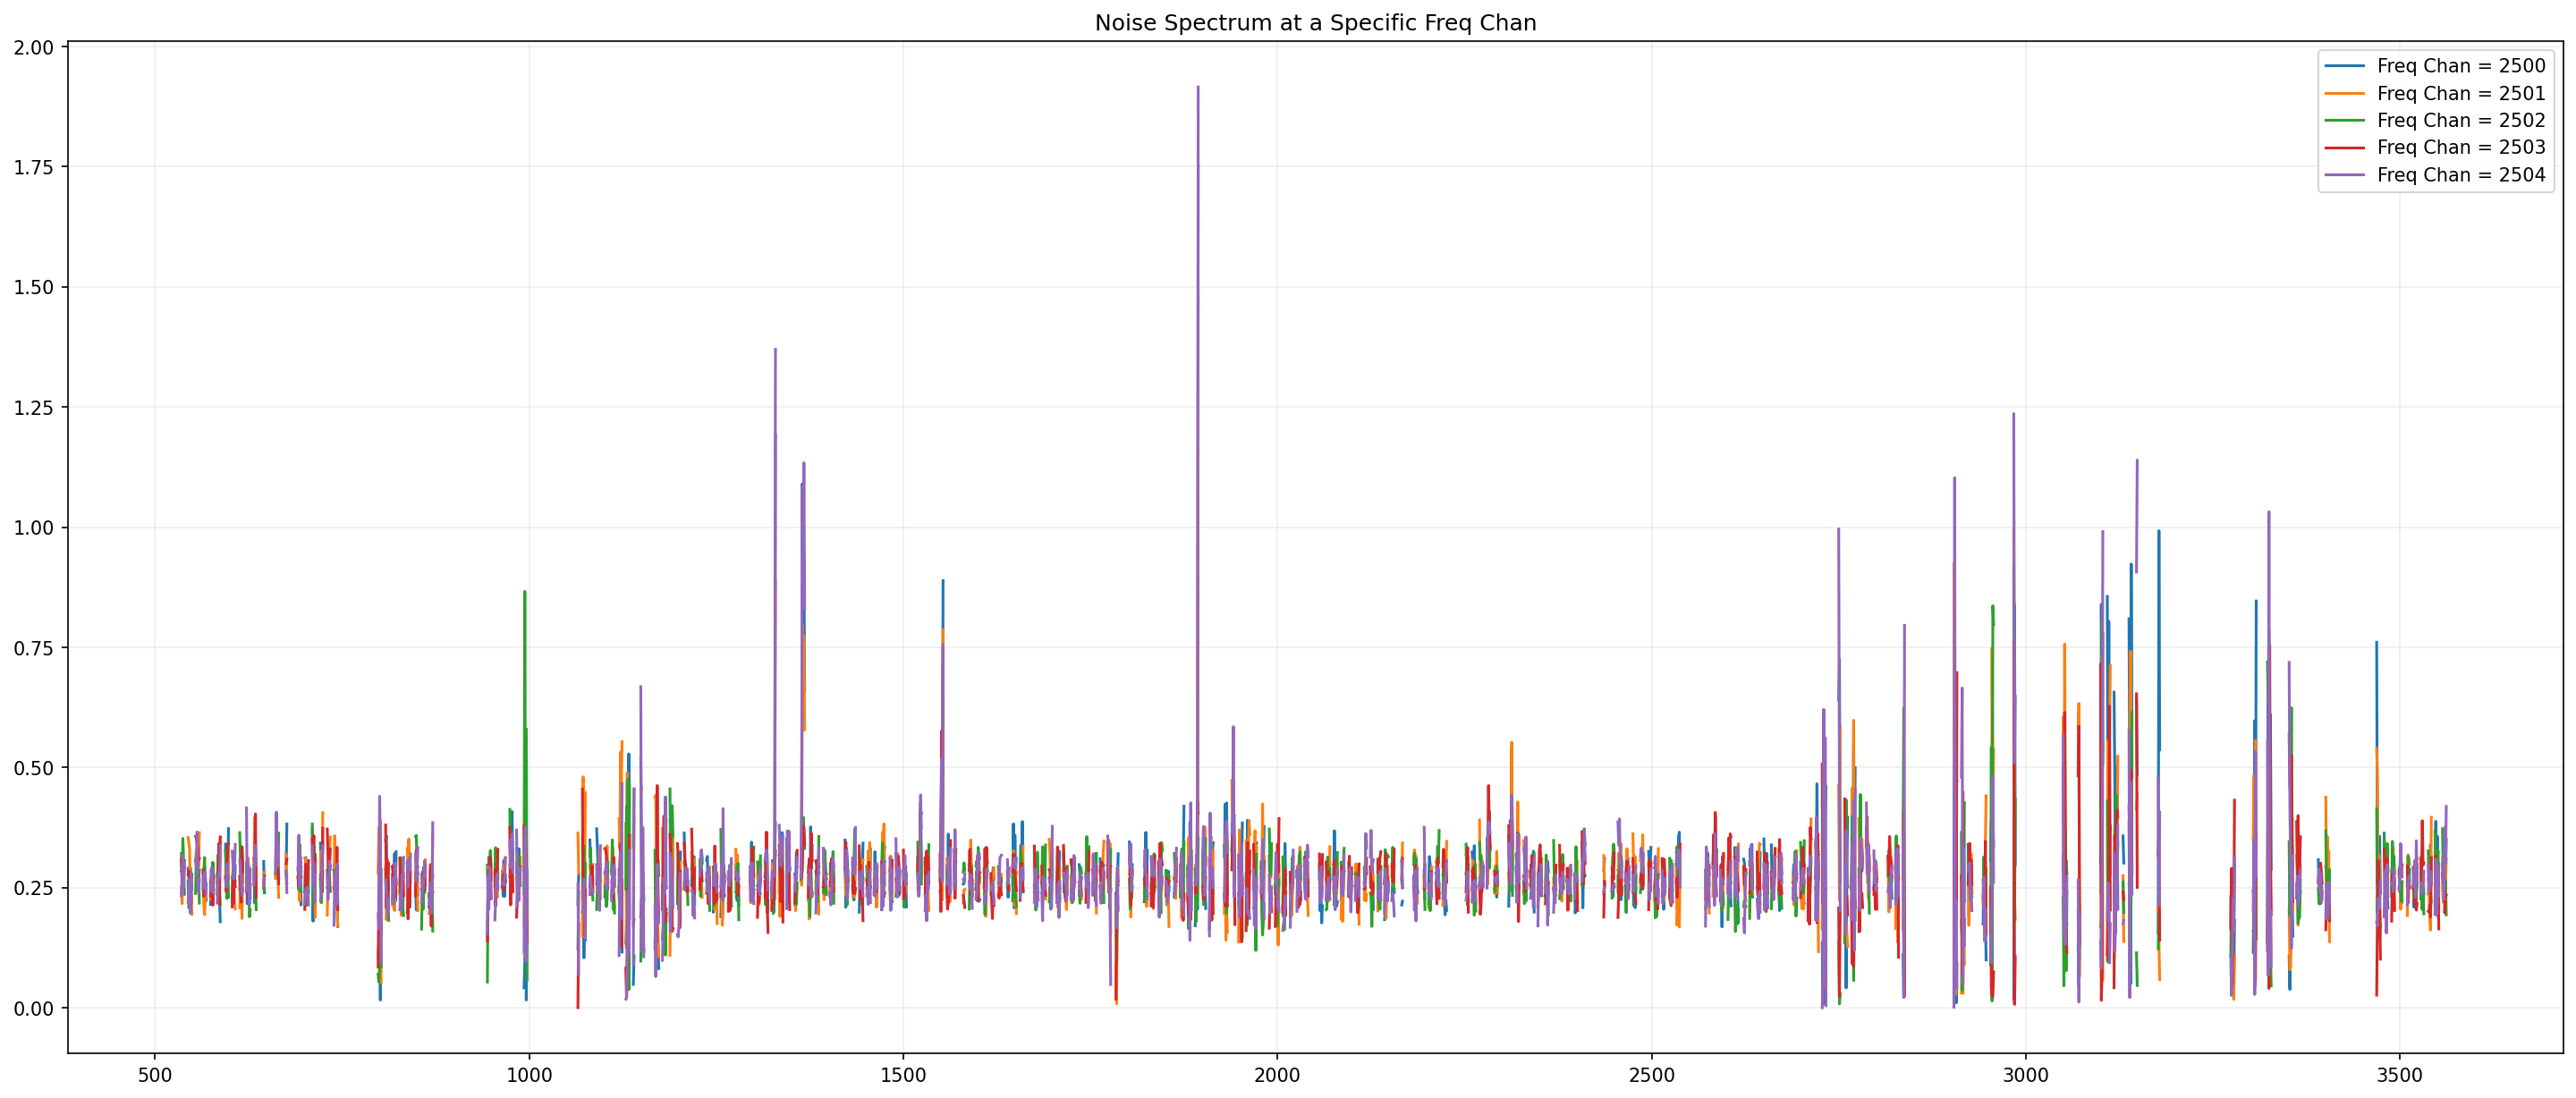

In [292]:
figure, ax = plt.subplots(1, 1 , figsize=(24, 10), dpi=150)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

[plot(AbbaAllAnts[:,i], label= f'Freq Chan = {i}', Title='Noise Spectrum at a Specific Freq Chan', ax=ax) for i in range(2500, 2505)]

The above plot, is the noise spectrum at specfic frequency channels that are 'clean'. This plot shows us that the noise specturm, the data that remains after the sky-subtraction is slowly varying across time.

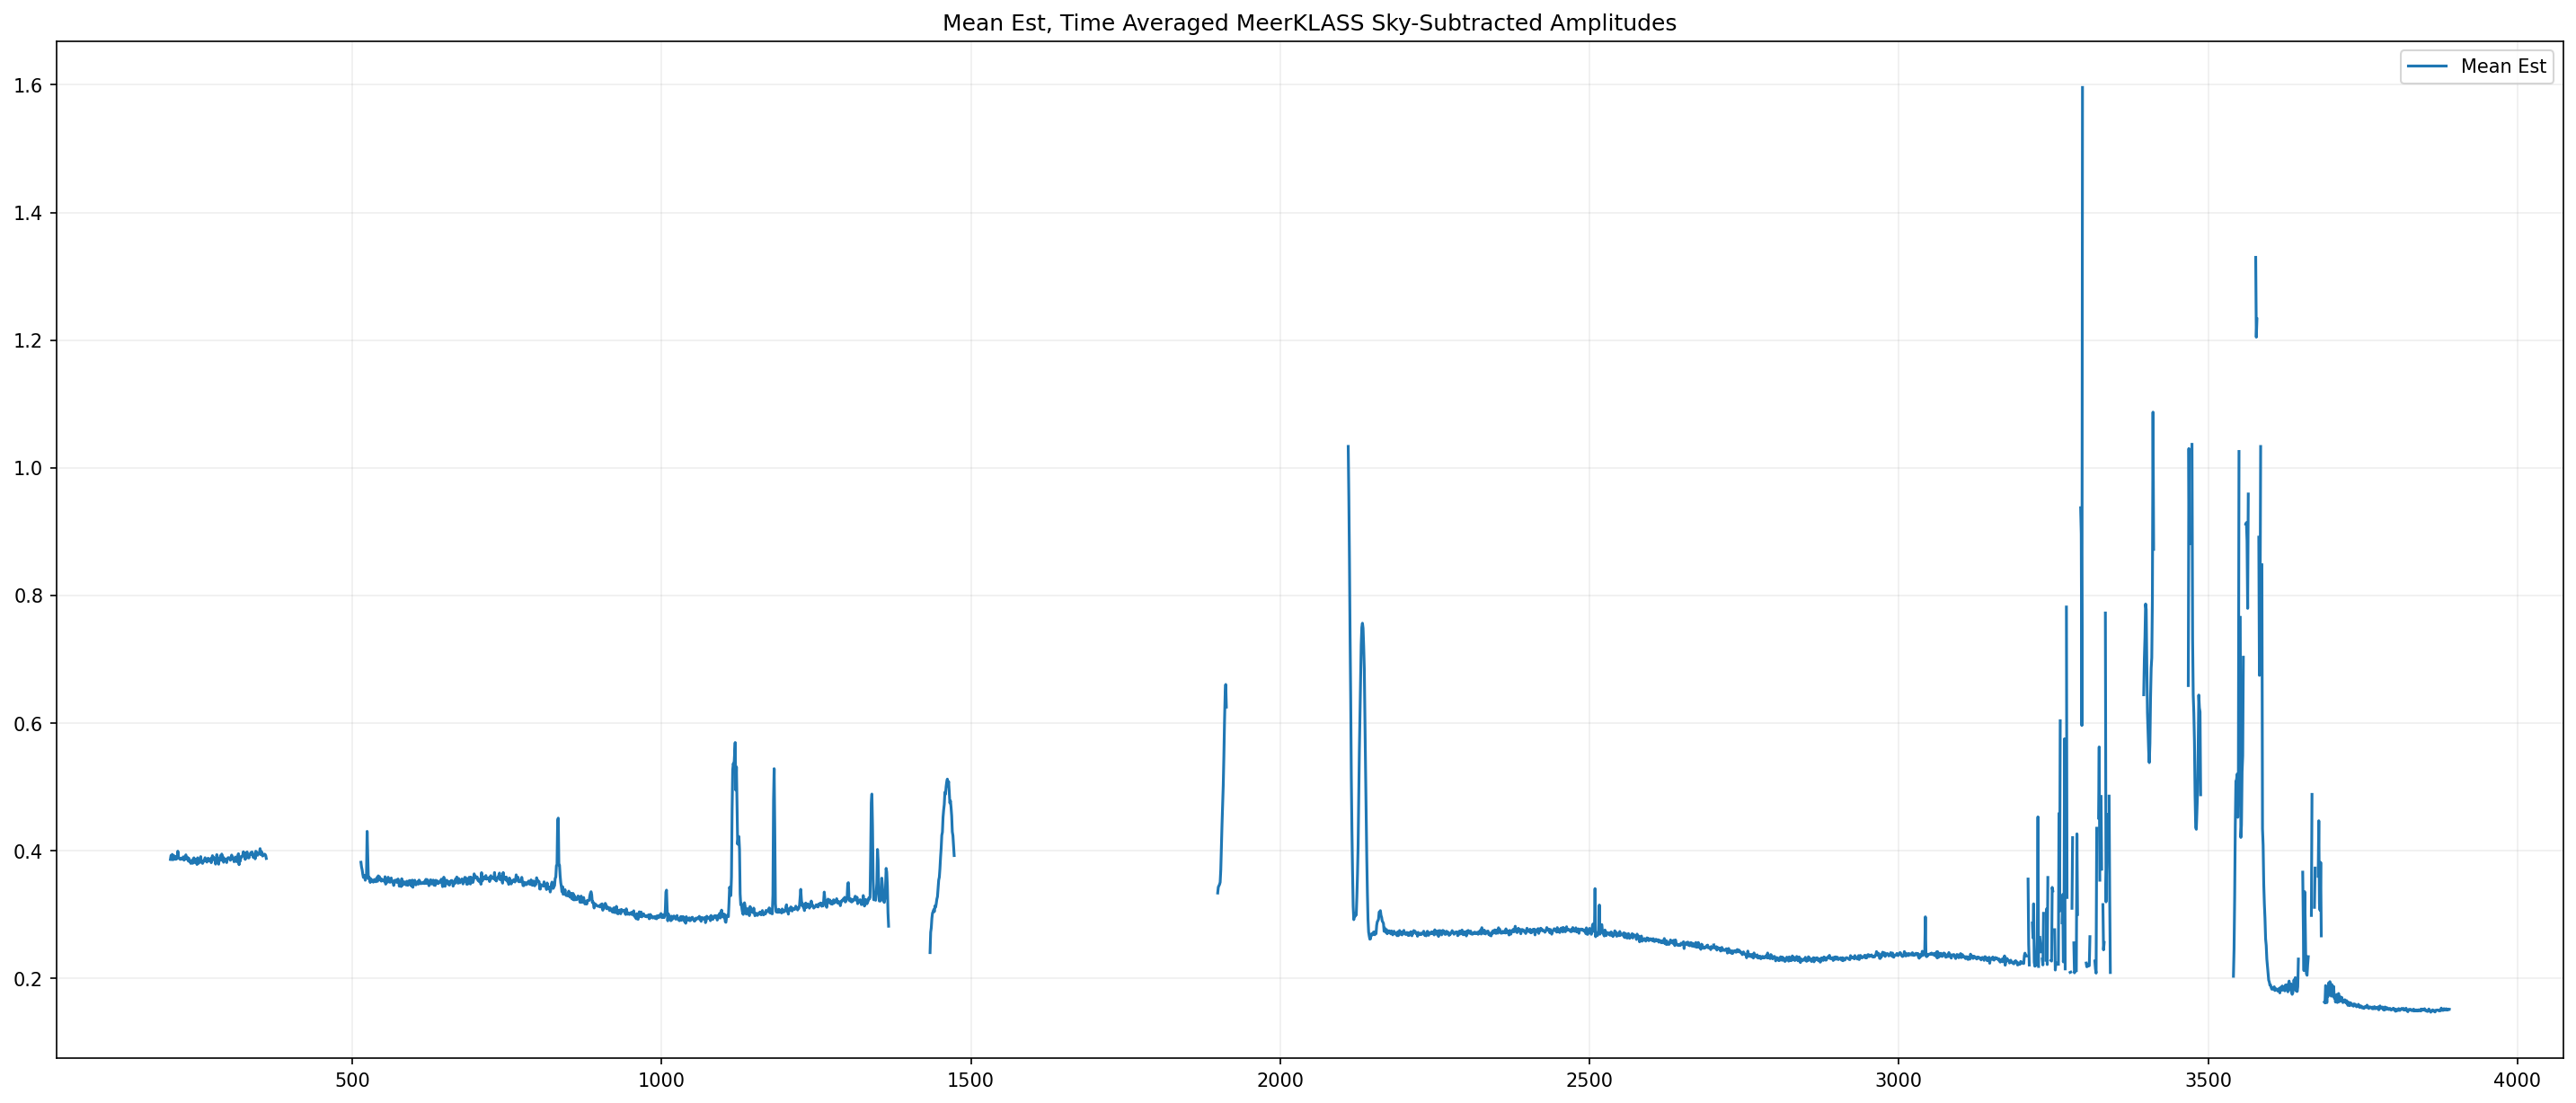

In [293]:
figure, ax = plt.subplots(1, 1 , figsize=(24, 10), dpi=150)
meanEst = np.nanmean(AbbaAllAnts, axis=0) #time average of the antenna averaged noise spectrum.
plot(meanEst, label= 'Mean Est', Title='Mean Est, Time Averaged MeerKLASS Sky-Subtracted Amplitudes', ax=ax) 

# Waterfall plot of the ABBA Noise Spectrum (SSINS)

This is a waterfall plot of the Sky-subtracted Incoherently Averaged Visibilities, with level 1 flags applied on the data. What is important to note is at this stage we can't at first or even deeper inspection see the presence of fainter RFI, The reason for this is we simply are required to boost the contrast between the distributions that are 'mixed' in this spectrum. At this stage the spectrum is a mixture distributon of noise (folded gaussian distributed amplitudes) and RFI (of which fainter RFI amplitudes lie below the noise of this spectrum). The next step of the SSINS algorithm will be standardising each data point (t,f) in this waterfall map effectively creating a z-score waterfall map, the data transformation will contrast the underlying RFI distribution against the noise amplitides distribution.

<AxesSubplot:title={'center':'ABBA Noise Spectrum'}, xlabel='Frequency Chan', ylabel='Time Chan'>

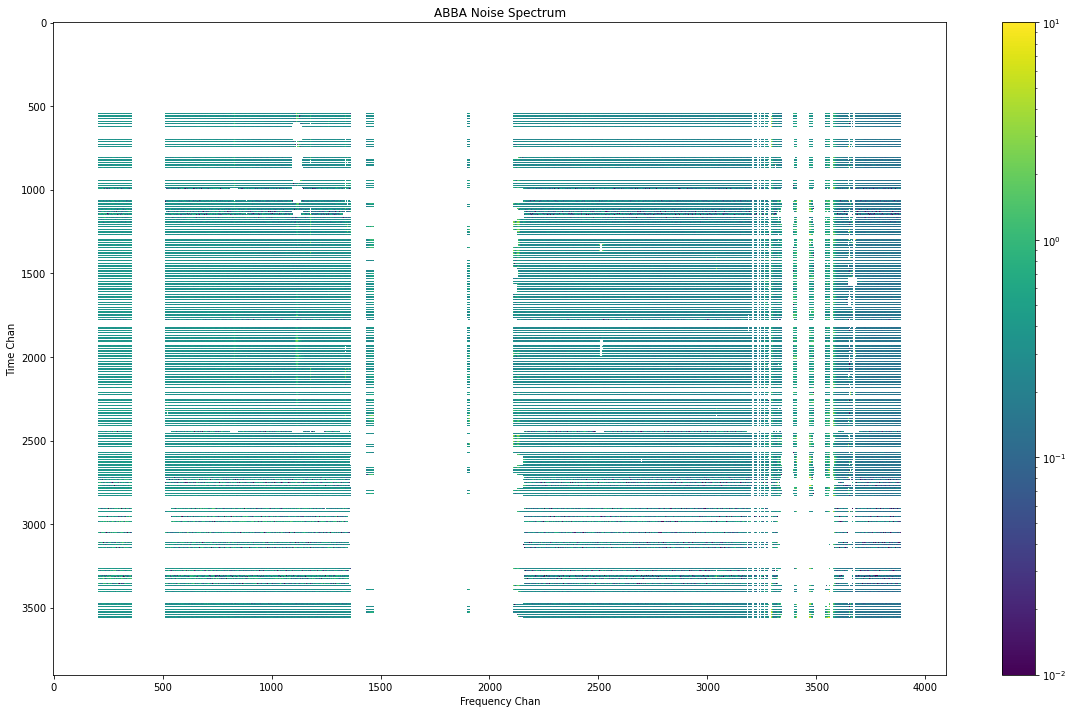

In [345]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
Noise_Spectrum_abba = AbbaAllAnts
plot_waterfall(AbbaAllAnts, interpolation='nearest', norm=norm, figsize=(20,12), Title= 'ABBA Noise Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

# Histogram plots of the ABBA Noise Spectrum (SSINS)


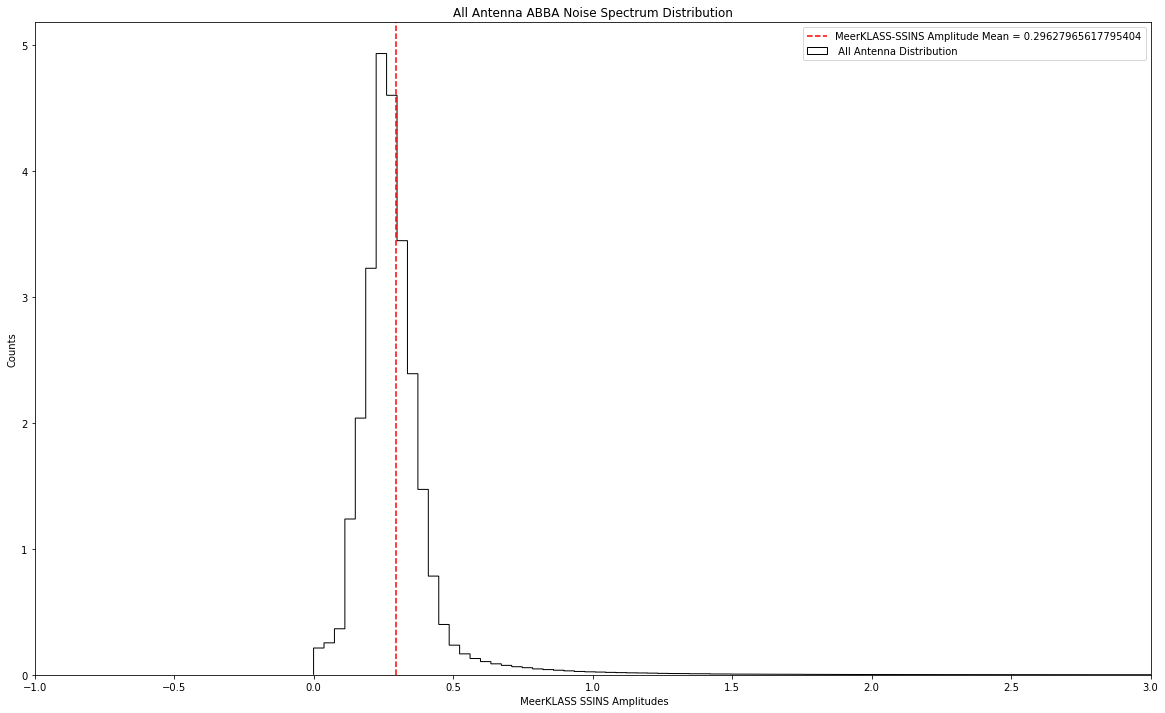

In [295]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)  # (t,f)
mean = np.nanmean(AbbaAllAnts)

fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(AbbaAllAnts),label= " All Antenna Distribution", Title=f'All Antenna ABBA Noise Spectrum Distribution', bins=1000, xlim=(-1,3), density=True, figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(mean, color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {mean}')
ax.legend()

plt.show()

## **1.4. RMS Statistics of the ABBA Sky-Subtractions**  <a class="anchor" id="section1.3"></a>



 RMS Statistics of the sky-subtractions, to determine the level of noise reduction, the signal reduction should correspond to 1 over the square of the antennas we did the average over. I have done the RMS for all receivers, see a lot of differences. 

In [296]:
# RMS calculated over all receivers
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
rms_all_ants = np.sqrt(np.nanmean(AbbaAllAnts**2)/AbbaAllAnts.shape[0])
print(f'The RMS from averaging over all the receivers is:{rms_all_ants}') 


The RMS from averaging over all the receivers is:0.00580427532587131


In [297]:
# This is calculates the RMS at a receiver level for all frequency and time, the RMS over the SS spectrum

def rms(ss_data):
    N = ss_data.shape[0]
    rms_all = np.sqrt(np.nanmean((ss_data)**2)/N)
    return rms_all

In [298]:
# This calculates the RMS at a receiver for a particular frequency in a Sky Subtraction Spectrum

def rms_mu(ss_data, mu):
    
    N = ss_data.shape[0]
    rms_mu = np.sqrt(np.nanmean((ss_data[:,mu])**2)/N)
    
    return rms_mu

In [299]:
rms_reduced_expected = 1/(np.sqrt(len(ants)))
print(f'The Expected Reduced RMS from averaging over all the receivers is: {rms_reduced_expected}') #Theoretical Value we expect


The Expected Reduced RMS from averaging over all the receivers is: 0.16222142113076254


In [300]:
# Expected RMS Values for each receiver
rms_array_expected = []
for ant_value, (abba_vis) in abba_ss_dict.items():

    rms_val =  rms(abba_vis)
    d_rms = rms_val - rms_reduced_expected
    
    #print(f'RMS for reciever {ant_value}  is : {rms_val}')
    #The Expected RMS difference between the Receiver RMS and all antenna average RMS : {d_rms}')


In [301]:
# RMS for all Recievers ABBA Sky Subtraction
rms_array = []
for ant_value, (abba_vis) in abba_ss_dict.items():
    rms_value =  rms(abba_vis)
    rms_array.append(rms_value)
    d_rms = rms_value - rms_all_ants
    #print(f'RMS for reciever {ant_value}  is : {rms_value}, The difference between the Receiver RMS and all antenna average RMS : {d_rms}')
rms_array = np.array(rms_array)


### Antenna RMS can help us evaluate the sky-subtractions done at each receiver, and again if a receiver is bad (ie, sky- rmoval hasnt worked very well) we can exclude them from the SSINS Algorithm

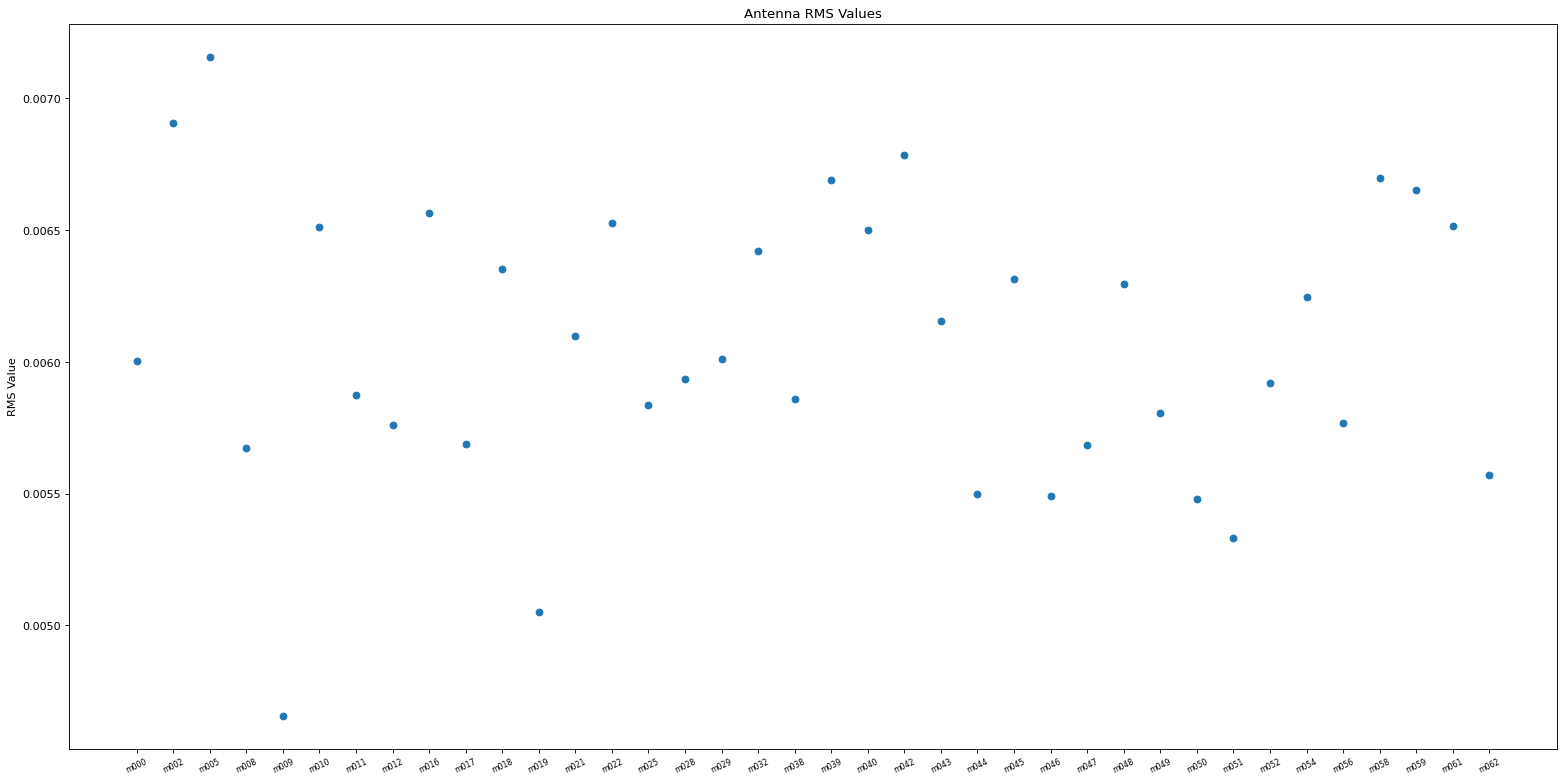

In [302]:
fig, ax = plt.subplots(1, figsize=(24,12), dpi=80)
plt.plot(rms_array, '.', markersize=12)
#plt.axhline(y=10, color='k')

plt.xticks(np.arange(len(ants)), ants)
plt.xticks(fontsize=7, rotation=25)
plt.title('Antenna RMS Values')
plt.ylabel('RMS Value')

plt.show()

 #### RMS Result Discussion:
 The above plot shows the mean signal response of the sky-subtraction spectrums from each receiver, this is a relatively good visual way to identify receivers that have worse possible sky-subtraction spectrums and thereafter exclude them from our algorithm.

## **1.5. Sky-Subtracion and Noise Amplitide Distributions**  <a class="anchor" id="section1.3.1"></a>

### Histogram plots of the ABBA Sky-Subtraction Waterfalls

In [303]:
def plot_hist(x : np.ndarray, label=None, Title =None, xlim : tuple = None, ylim=None, figsize=None, ax=None, bins=None, alpha=None, density=None, color=None ,edgecolor=None, histtype=None, xlabel=None, ylabel=None):
   
    if ax is None:  # Create a new figure and axes if not being passed in as a parameter
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.hist(x, label=label,bins=bins, alpha=alpha, density=density, color=color, edgecolor=edgecolor, histtype=histtype)
    ax.legend()
    ax.set_title(Title)
    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(*xlim)
        
    return ax

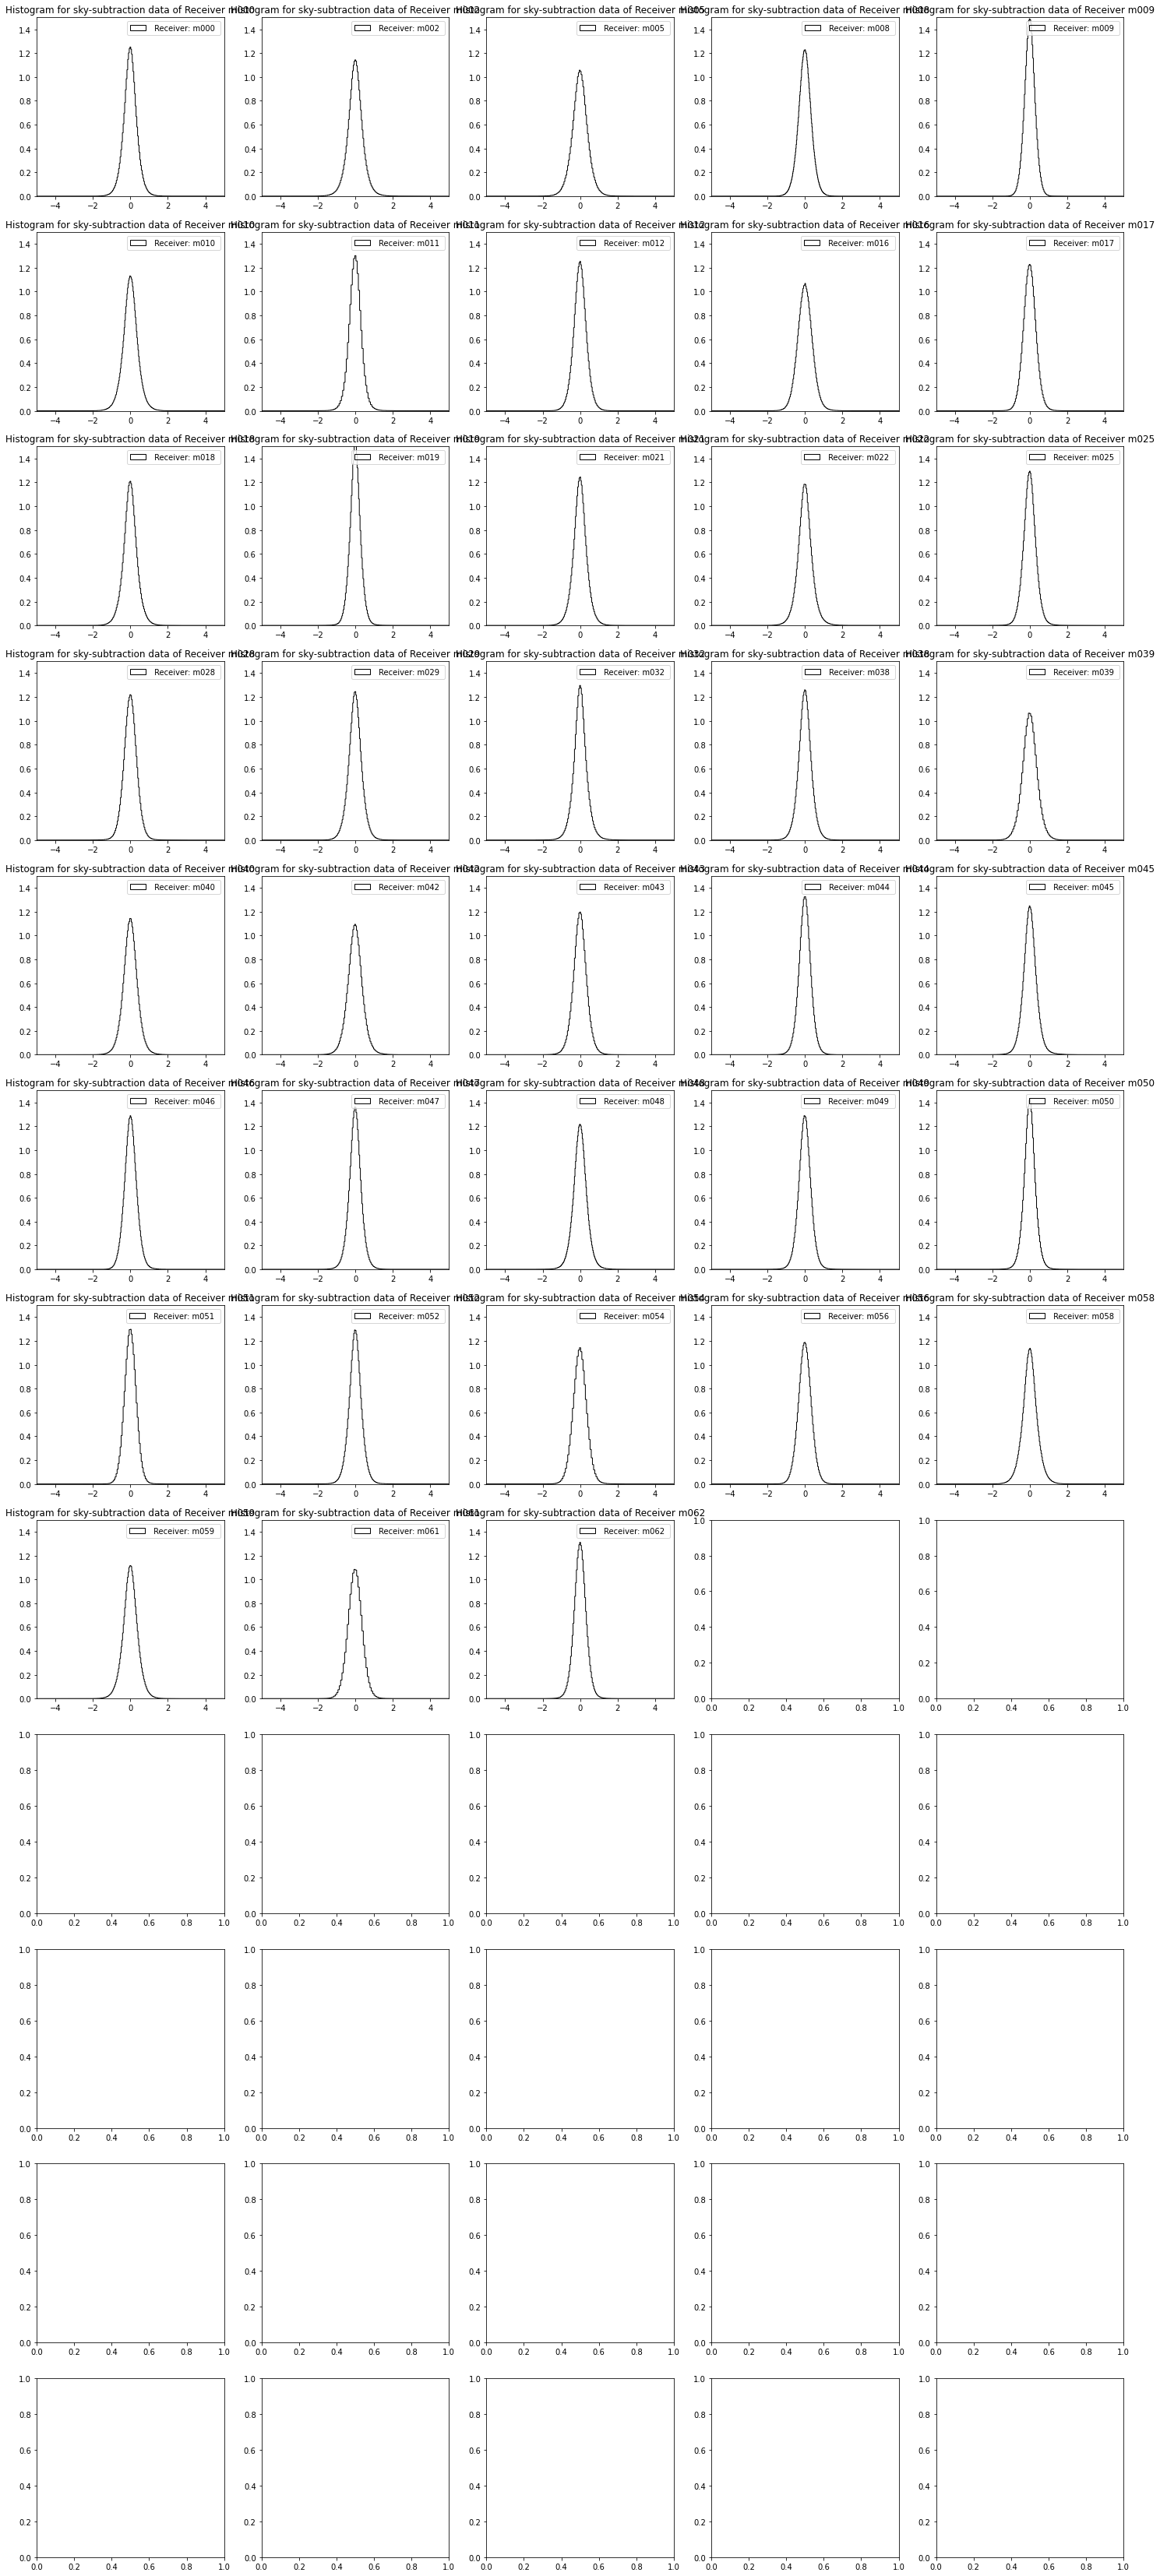

In [304]:
rows = 12 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_hist(np.ravel(abba_ss_dict[ant_value]),label= f" Receiver: {ant_value} ", Title=f'Histogram for sky-subtraction data of Receiver {ant_value}', bins=1000, xlim=(-5,5), ylim=(0, 1.5), histtype='step', ax=ax, density=True) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
plt.show()   
   

### Histogram plots of the ABBA Noise Spectrum

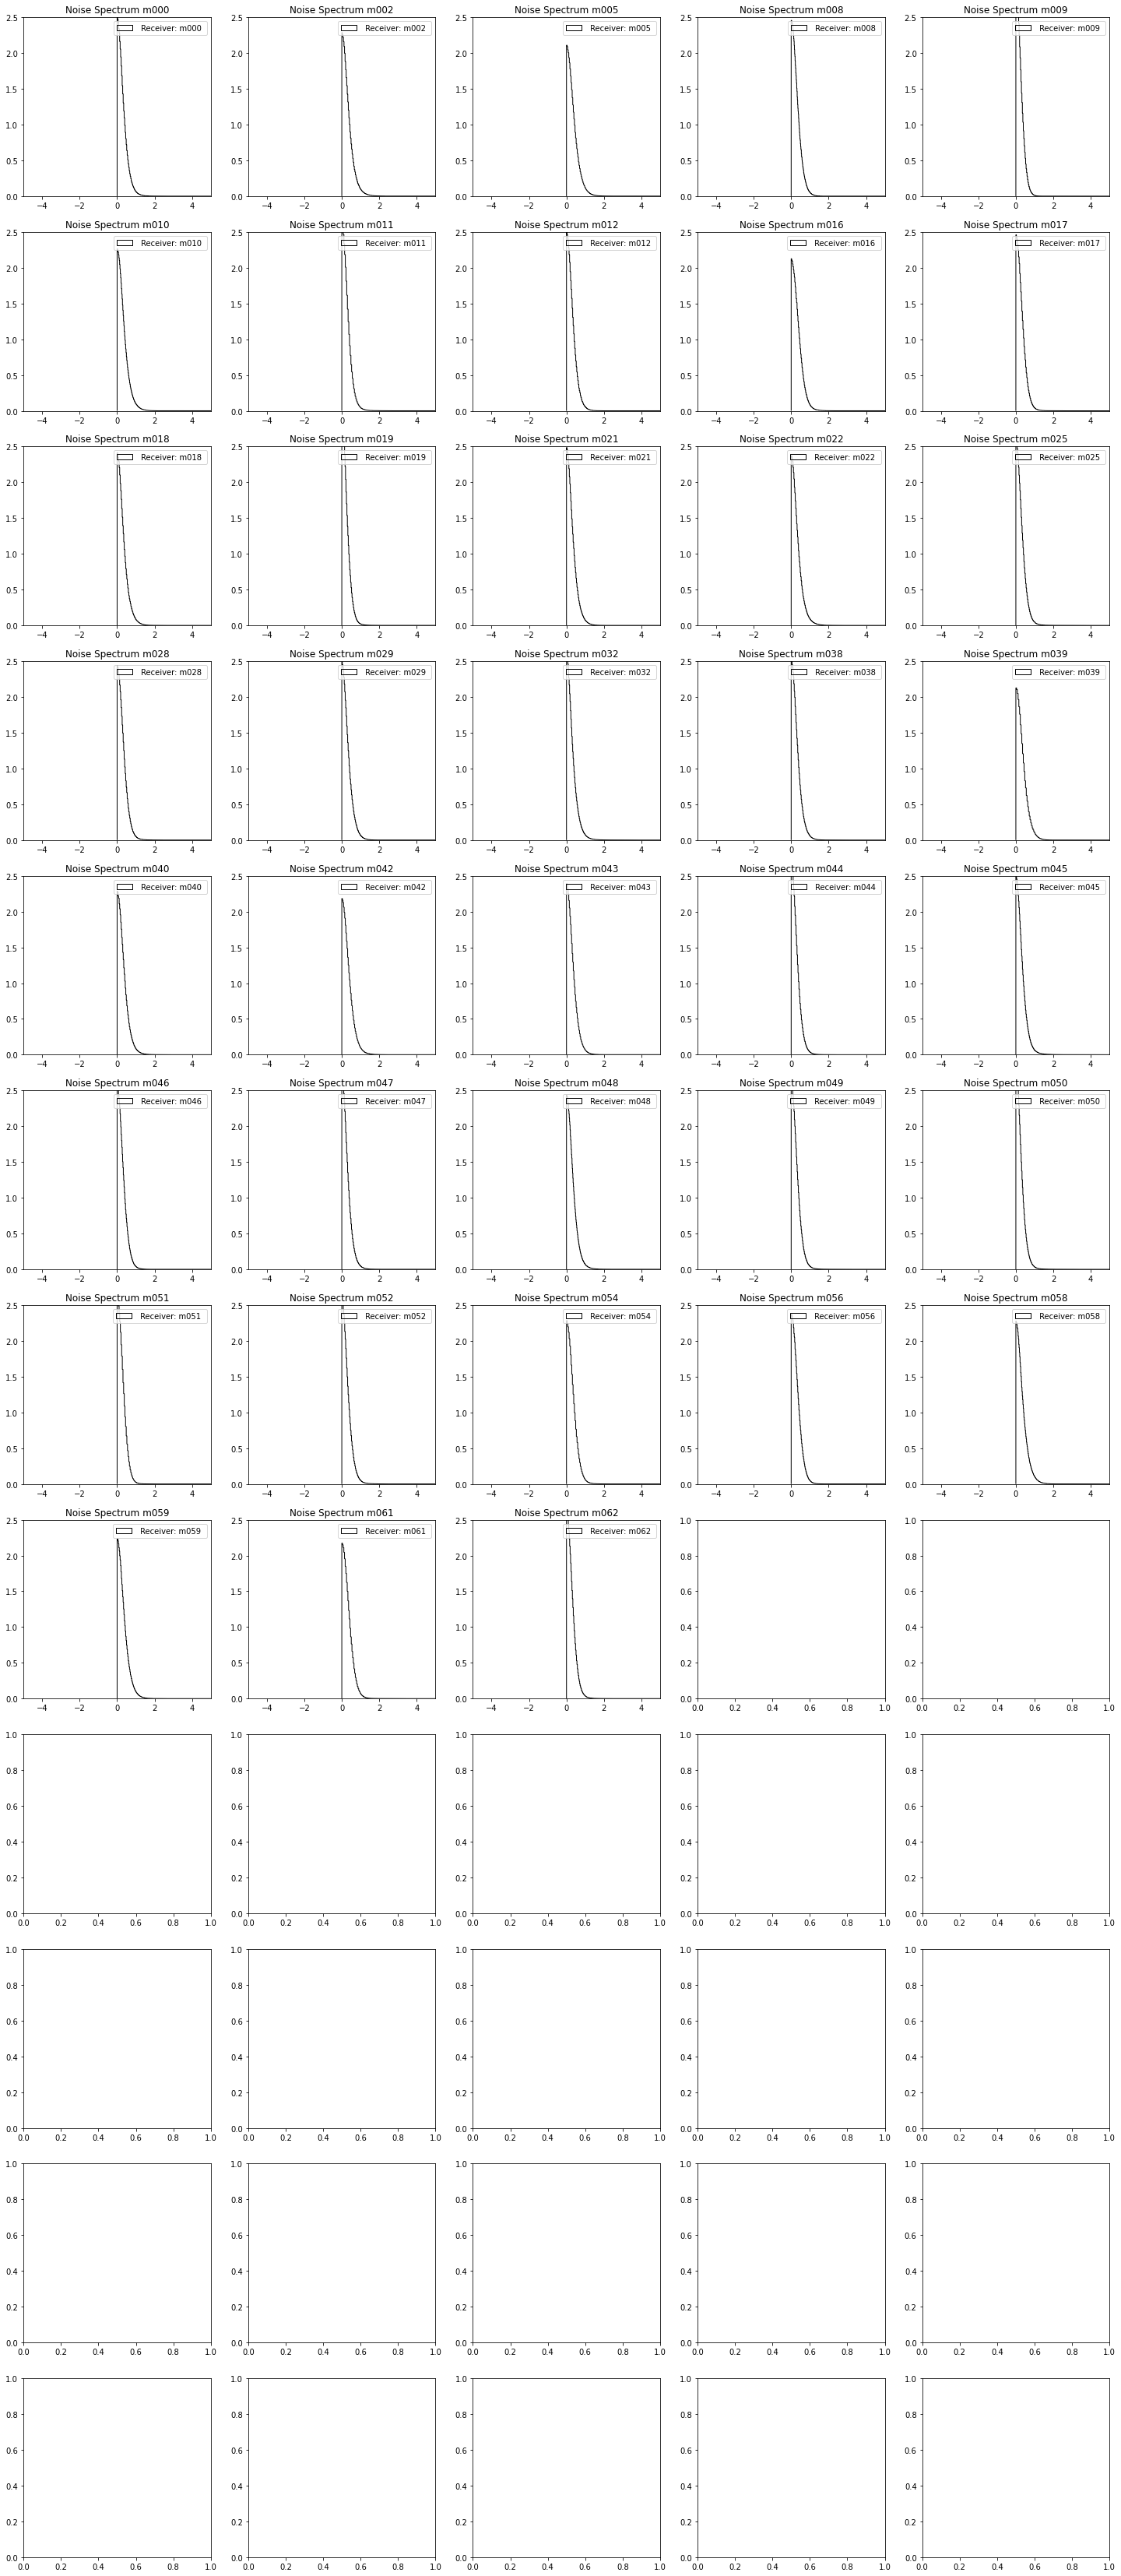

In [305]:
rows = 12 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_hist(np.ravel(np.abs(abba_ss_dict[ant_value])),label= f" Receiver: {ant_value} ", Title=f'Noise Spectrum {ant_value}', bins=1000, xlim=(-5,5), ylim=(0, 2.5), histtype='step', ax=ax, density=True) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
plt.show()   
   

# **1.6. Z - Score of the ABBA Noise Spectrum (SSINS)**  <a class="anchor" id="section1.4"></a>

In [346]:
z_score_map_abba = cal_zscore(ss_l1)
z_score_map_abba[3010:3050, 3001]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [307]:
min= np.nanmin(z_score_map_abba)
max = np.nanmax(z_score_map_abba)
mean =np.nanmean(z_score_map_abba)
median = np.nanmedian(z_score_map_abba)

print(f'z_score_map_abba minimum val is: {min}')
print(f'z_score_map_abba maximum val is: {max}')
print(f'z_score_map_abba mean val is: {mean}')
print(f'z_score_map_abba median val is: {median}')
print(f'z_score_map_abba range val is: {max-min}')

z_score_map_abba minimum val is: -8.159268286286224
z_score_map_abba maximum val is: 1088.6537924108336
z_score_map_abba mean val is: 1.7078385271565165e-16
z_score_map_abba median val is: -0.24727033624745193
z_score_map_abba range val is: 1096.81306069712


# Z - Score Waterfall : MeerKLASS-SSINS Post Level 1
The z-score is a statistical relationship that describes the distribution, i.e deviation  of  data points from the mean value of the data. Mean Subtract  The idea is to transform the mixture distribution into a guassian like distribution, by    
In this z-score map of we have plotted the data using a discrete colobar, this is done to simply the visualisation of data points that lie at higher/lower deviations from the mean value of the data z-score.

<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

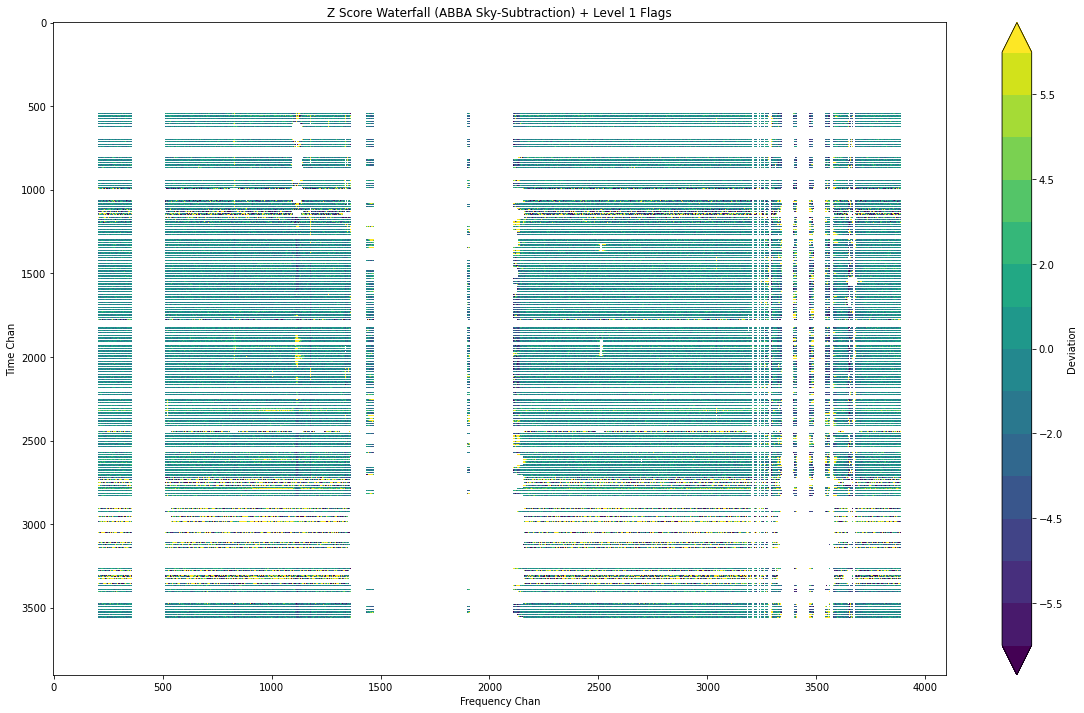

In [341]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(z_score_map_abba, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

# Histogram plot of the ABBA Z Score Post Level 1 

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Z-Score Histogram Level 1'}, xlabel='Deviation', ylabel='Counts'>

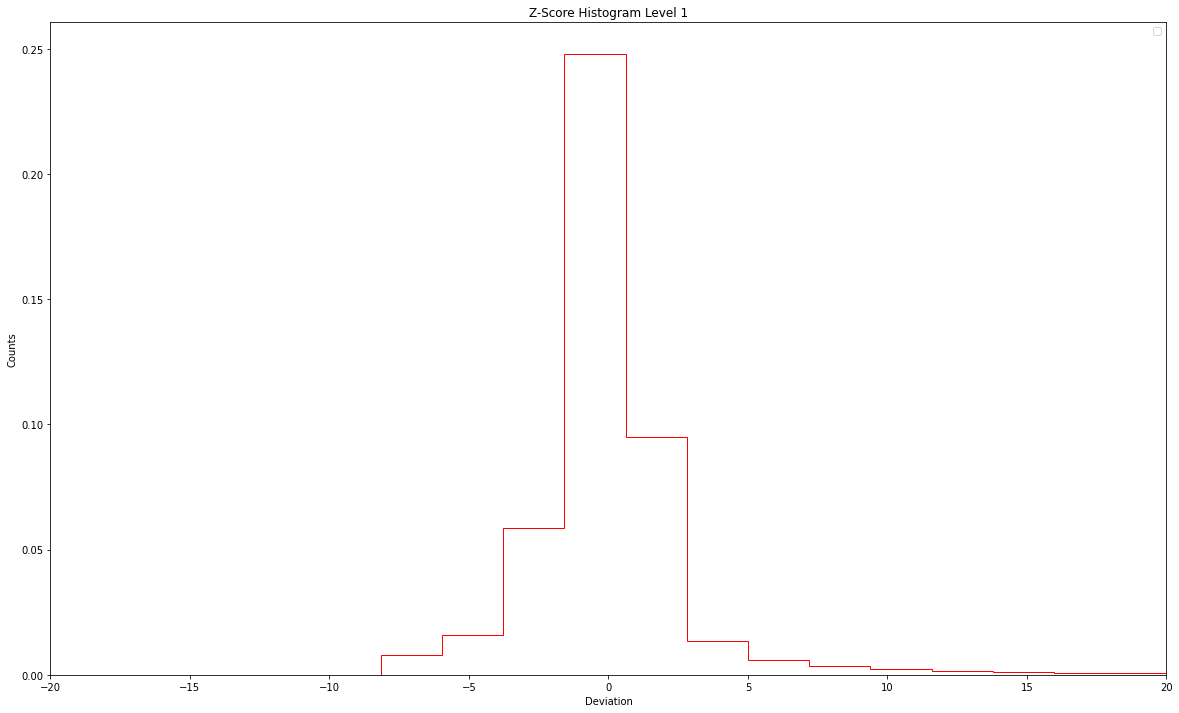

In [309]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_abba), Title='Z-Score Histogram Level 1', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=True, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


In [357]:

def mask_to_flags(nd_s0, zscore_mask, ants, nd_flags=None, pipeline_flags=None):

    """This function will return the flags for the raw, non-time differenced data"""
    
    shape = list(zscore_mask.shape)
    flags_new = np.zeros([shape[0] + 3] + shape[1:], dtype=bool)  #(t, f) ----> (3467, 4096)  # expanded the dims
    flags_new[:-3] = zscore_mask
    flags_new[3:] = np.logical_or(flags_new[3:], flags_new[:-3])
    
    if nd_flags is None and pipeline_flags is None:
        return flags_new

    else:
        
        nd_flags= stacked_flags(nd_flags, ants)
        nd_flags = np.ones_like(flags_new, dtype=bool)
        nd_flags[nd_s0, :] = False 
        
        pipeline_flags= stacked_flags(pipeline_flags, ants)
        
        allflags =  np.logical_or(nd_flags, pipeline_flags)
        new_flags = np.logical_or(flags_new, allflags)
                
    return new_flags

In [ ]:

def stacked_flags(pipeline_flags, ants):
    """This function create a combined mask by summing the flags accross recievers and taking a relevant score
    Parameters:
    -----------
    score == 59
    pipeline_flags: dict of the pipelines flags for each receiver in the observation block
    
    Return:
    -------
    stacked_flag: 2D nd.array (t,f)
    
    """
    
    stacked_flags = np.stack(list(pipeline_flags.values()), axis=0)
    stacked_int_flags = stacked_flags.astype(int)
    stacked_score= np.sum(stacked_int_flags, axis=0)
    stacked_flag = ((stacked_score.astype(float) >= len(ants)-1)) 
    return stacked_flag

In [365]:
def pipeline_flags(nd_s0, ants, nd_flags, pipeline):
    
    pipeline_flags= stacked_flags(pipeline, ants)
    nd_flags= stacked_flags(nd_flags, ants)
    nd_flags = np.ones_like(pipeline_flags, dtype=bool)
    nd_flags[nd_s0, :] = False 

    
    pipeline_flags =  np.logical_or(nd_flags, pipeline_flags)
    return pipeline_flags

In [358]:
zscore_l1_mask = ((z_score_map_abba.astype(float) < -4.5) ^ (z_score_map_abba.astype(float) > 4.5) )
z_score_flags = mask_to_flags(nd_s0, zscore_mask=zscore_l1_mask, ants=ants, nd_flags=nd_flags_dict, pipeline_flags=l1_flags_dict)

<AxesSubplot:title={'center':'Pipeline Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

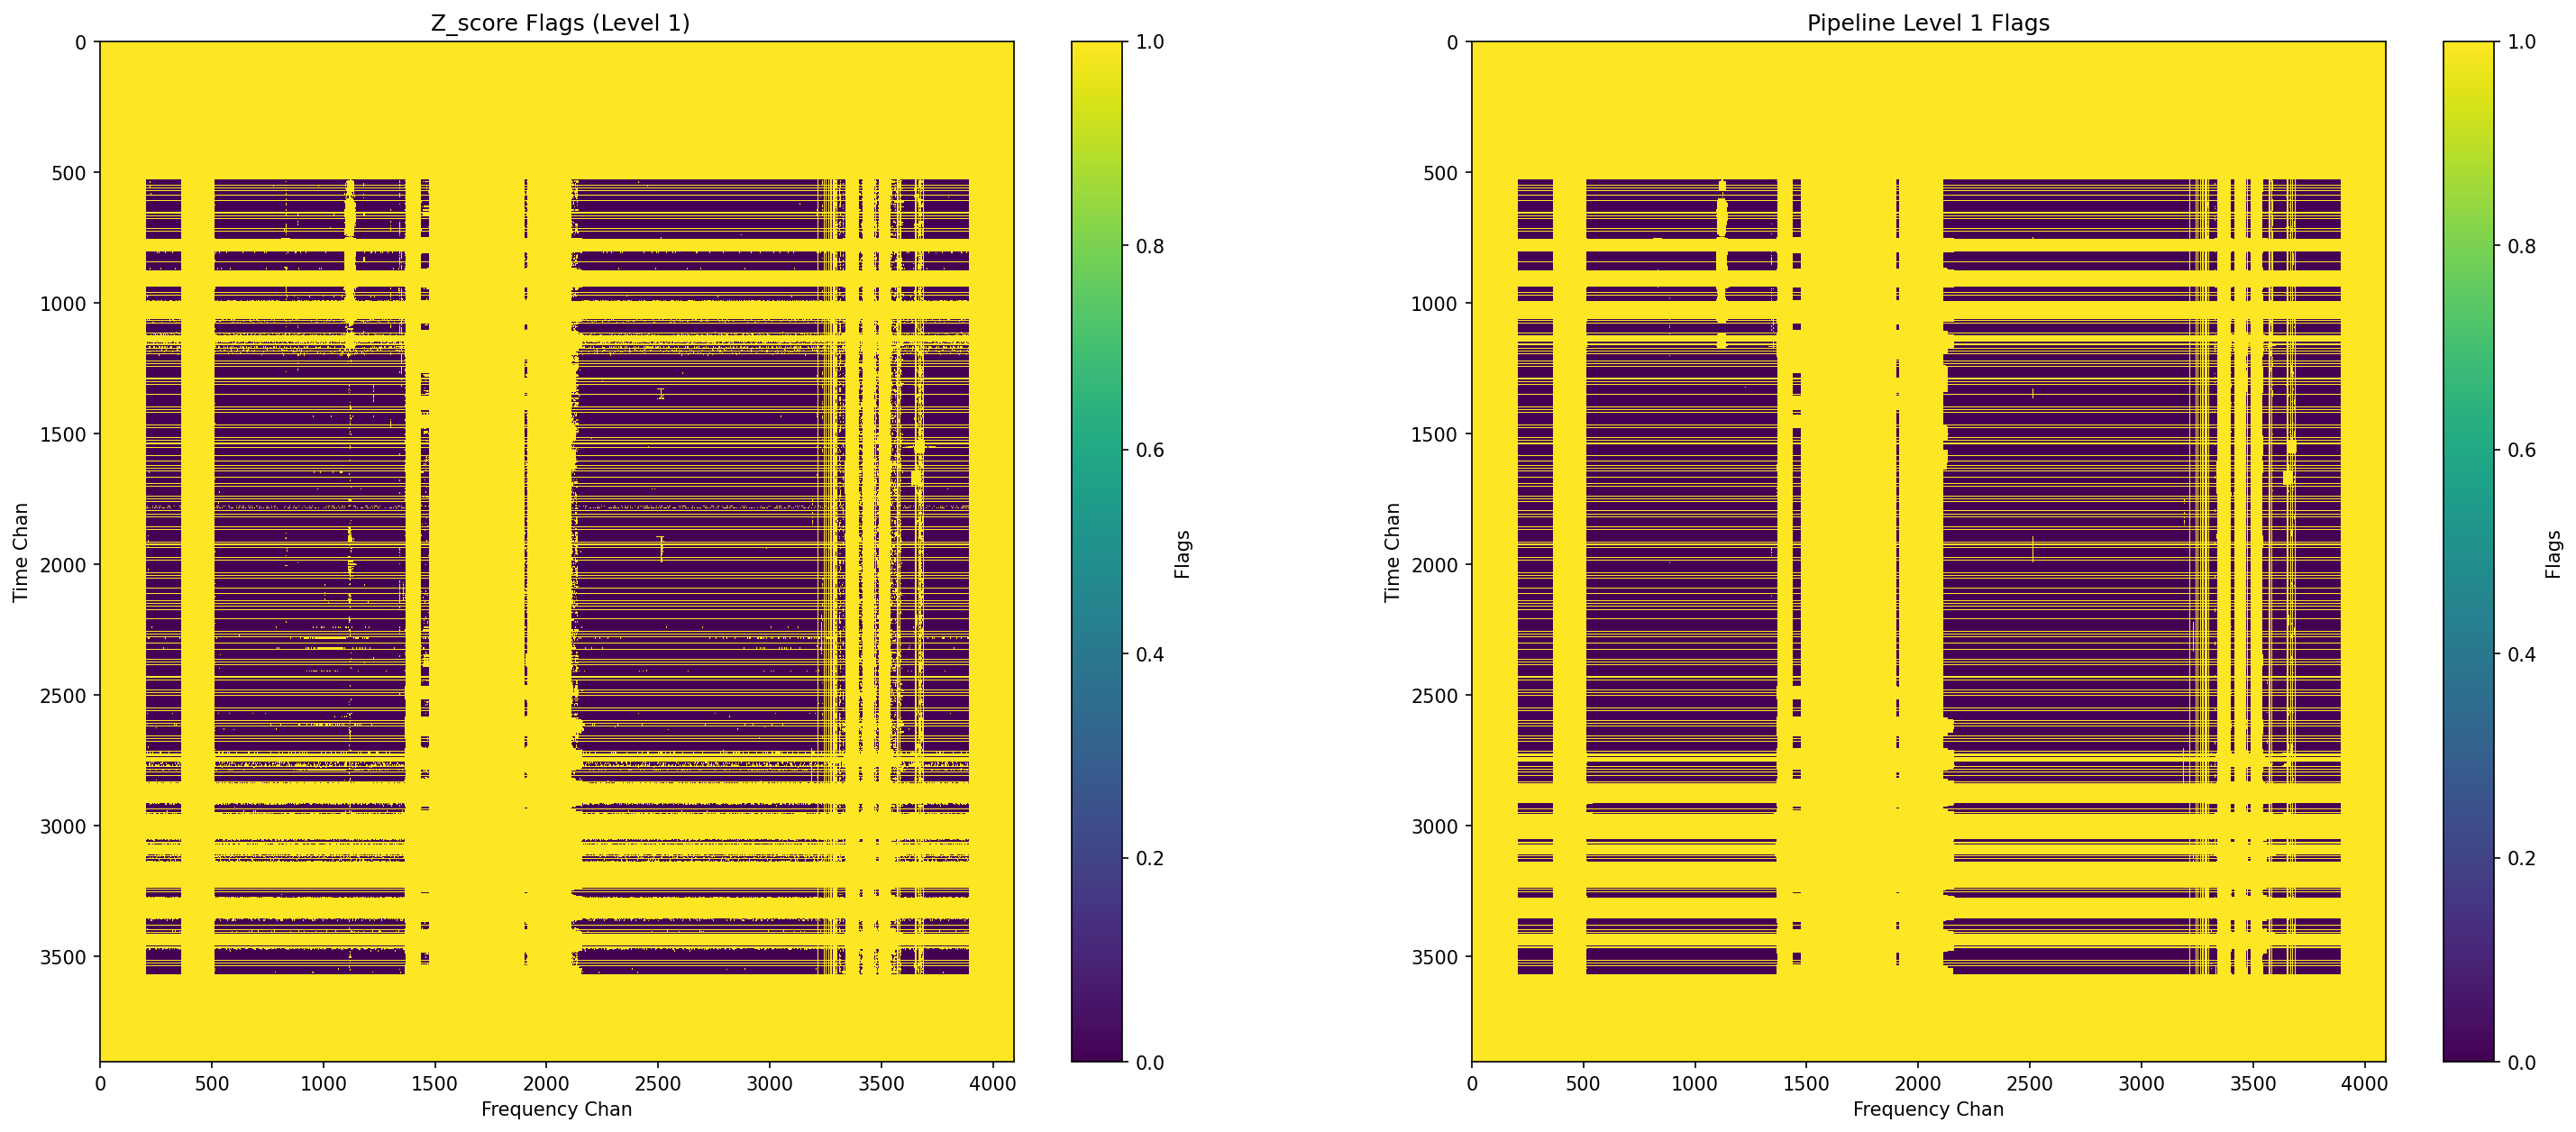

In [366]:

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150) #correct stacked + summed receiver masks that matches the z-score
 
plot_waterfall(z_score_flags, Title = ' Z_score Flags (Level 1)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(pipeline_flags(nd_s0, ants=ants, nd_flags= nd_flags_dict, pipeline=l1_flags_dict), Title = 'Pipeline Level 1 Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[1]) 

In [367]:
def plot_waterfall(x,label=None,  Title =None, ylim : tuple = None, figsize=None, ax=None, vmax=None,vmin=None, interpolation= None, norm=None, cmap=None, xlabel=None, ylabel=None, clabel=None):

    if ax is None:  # Create a new figure and axes if not being passed in as a parameter
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    im = ax.imshow(x, label=label, vmax=vmax, vmin=vmin, interpolation=interpolation, cmap=cmap, aspect='auto', norm=norm)
    ax.set_title(Title)
    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    #fig.colorbar(im, ax=ax) 
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, label=clabel) 
    
    if ylim is not None:
        ax.set_ylim(*ylim)
    return ax




from matplotlib.colors import LogNorm
import matplotlib as mpl
cmap = mpl.cm.hot
bounds =[0, 1, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Discrete plot of SSINS Flags Post Level 1 , Pipeline Flags and Unflagged Data

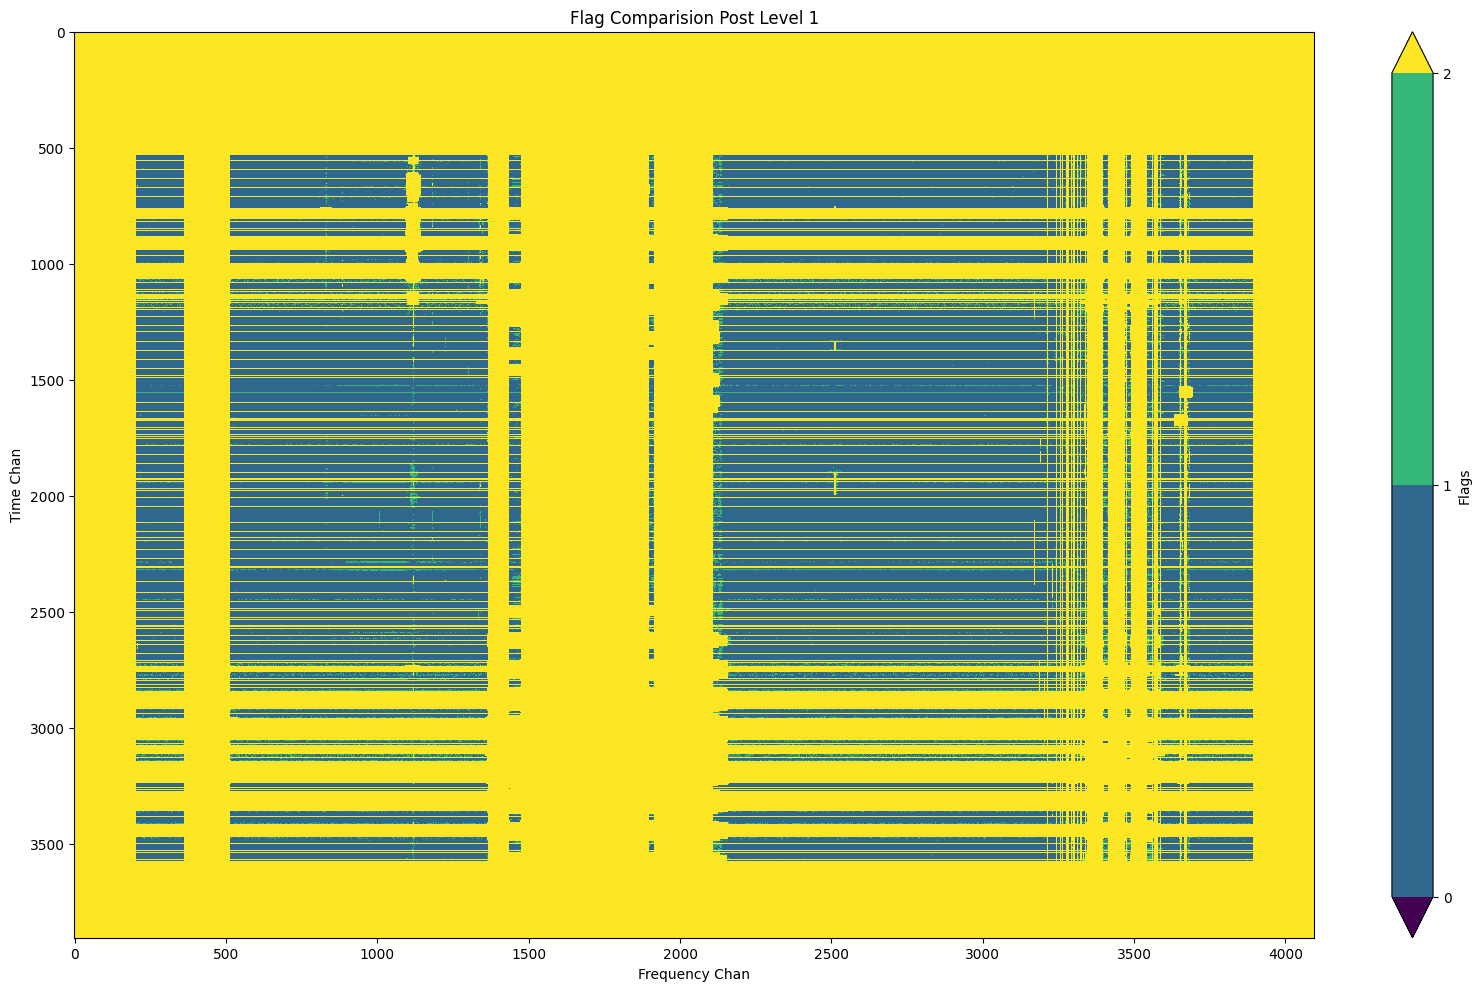

In [405]:
ssins_l1_flags = mask_to_flags(nd_s0=nd_s0, ants=ants, zscore_mask=zscore_l1_mask)
ssinsall = np.logical_or(ssins_l1_flags, pipeline_flags(nd_s0=nd_s0, ants=ants, pipeline=l1_flags_dict, nd_flags=nd_flags_dict))
s = ssinsall.astype(int) 

pipline_flags_l1 = pipeline_flags(nd_s0, ants=ants, pipeline=l1_flags_dict,nd_flags=nd_flags_dict)
nd_flags = stacked_flags(nd_flags_dict, ants)
p = pipline_flags_l1.astype(int)

both = ssinsall.astype(int) +  pipline_flags_l1.astype(int)


from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=100)
cmap = mpl.cm.jet
bounds =[0, 1, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(pipline_flags_l1.astype(int) + ssinsall.astype(int), Title = 'Flag Comparision Post Level 1', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', norm=norm, ax=ax) 
plt.savefig('discrete_ssins_flags.png')

In [372]:
fname

'1638386189'

In [373]:
zscore_l1_mask.shape

(3902, 4096)

### SSINS Post Level 1 Complete Flagging Comparision

In [396]:
ssins_l1_flags = mask_to_flags(nd_s0=nd_s0, ants=ants, zscore_mask=zscore_l1_mask, pipeline_flags= l1_flags_dict, nd_flags=nd_flags_dict)

ssins_l1_complete_flags = mask_all_fchan_tchan(z_flags=ssins_l1_flags, c_f=0.9, c_t=0.9)

<AxesSubplot:title={'center':'Flag Comparision Post Level 1 (Complete Time/Frequency Flagging)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

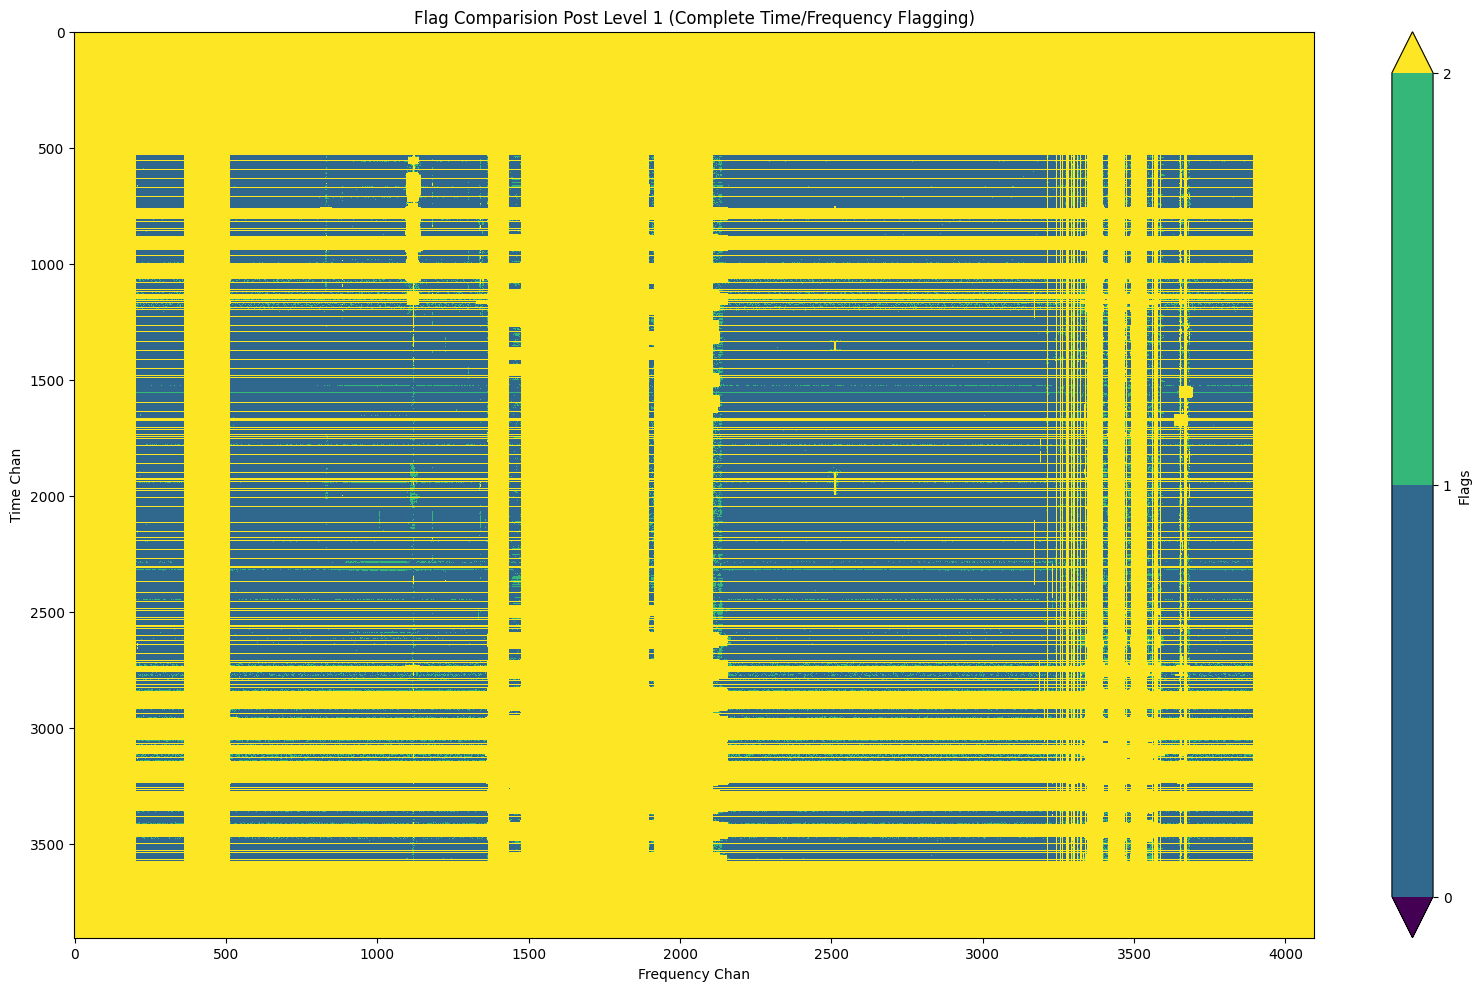

In [407]:


ssinsall_chan = np.logical_or(ssins_l1_complete_flags, pipeline_flags(nd_s0=nd_s0, ants=ants, pipeline=l1_flags_dict, nd_flags=nd_flags_dict))
s = ssinsall_chan.astype(int) 

pipline_flags_l1 = pipeline_flags(nd_s0, ants=ants, pipeline=l1_flags_dict,nd_flags=nd_flags_dict)
nd_flags = stacked_flags(nd_flags_dict, ants)
p = pipline_flags_l1.astype(int)

both = ssinsall_chan.astype(int) +  pipline_flags_l1.astype(int)

from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=100)
cmap = mpl.cm.jet
bounds =[0, 1, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(pipline_flags_l1.astype(int) + ssinsall.astype(int), Title = 'Flag Comparision Post Level 1 (Complete Time/Frequency Flagging)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', norm=norm, ax=ax) 

<AxesSubplot:title={'center':'SSINS Post Level 1 Complete Flags Check'}>

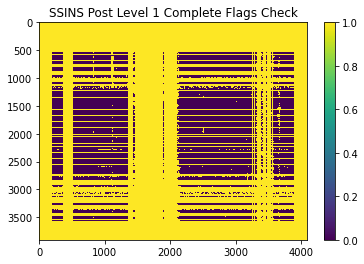

In [397]:
plot_waterfall(ssins_l1_complete_flags, interpolation='nearest', Title='SSINS Post Level 1 Complete Flags Check')


<AxesSubplot:title={'center':'SSINS Post Level 1 Incomplete Flags Check'}>

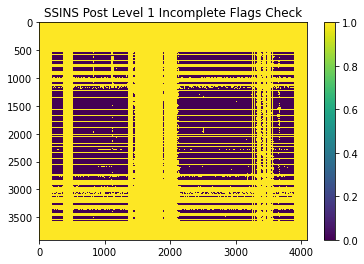

In [382]:
plot_waterfall(ssins_l1_flags, interpolation='nearest', Title='SSINS Post Level 1 Incomplete Flags Check')

# **Summary Result Post Level 1**

# Z - Score Waterfall : MeerKLASS-SSINS Post Level 4



In [398]:
l4_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level4/mask/')
for dish, (vis) in raw_vis_dict.items():
    try:
        with open(mask_dir / f'{fname}_{dish}_level4_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print(d3.keys())
    except(Exception):
        try:
            with open(mask_dir / f'{fname}_{dish}_level4_mask', 'rb') as f:
                d3 = pickle.load(f)
                print(f'mask loaded for dish {dish}')
    
        except FileNotFoundError:
            print(f'No mask file found for dish {dish}')
            
    mask_flags=d3['Inten_mask']
    l4_flags_dict[dish]  = mask_flags


mask loaded for dish m000
mask loaded for dish m002
mask loaded for dish m005
mask loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
mask loaded for dish m016
mask loaded for dish m017
mask loaded for dish m018
mask loaded for dish m019
No mask file found for dish m021
mask loaded for dish m022
mask loaded for dish m025
No mask file found for dish m028
mask loaded for dish m029
mask loaded for dish m032
mask loaded for dish m038
mask loaded for dish m039
mask loaded for dish m040
mask loaded for dish m042
mask loaded for dish m043
mask loaded for dish m044
mask loaded for dish m045
mask loaded for dish m046
mask loaded for dish m047
mask loaded for dish m048
mask loaded for dish m049
mask loaded for dish m050
mask loaded for dish m051
mask loaded for dish m052
mask loaded for dish m054
mask loaded for dish m056
mask loaded for dish m058
mask loaded for dish m059
mask loaded for dish m061
mask loaded for dish m06

In [399]:
from collections import defaultdict #stackexchange suggestion

d1_l4 = l4_flags_dict
d2_l4 = raw_vis_dict
d3_l4 = nd_flags_dict
d4_l4 = ps_flags_dict
dd_l4 = defaultdict(list)

for d in (d1_l4, d2_l4, d3_l4, d4_l4): # you can list as many input dicts as y
    for key, value in d.items():
        dd_l4[key].append(value)
    
print(dd_l4) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[528.61346436,  74.21876526,  74.35679626, ...,   0.        ,
          0.        ,   0.        ],
       [528.24810791,  74.31324768,  74.55072784, ...,   0.        ,
          0.        ,   0.        ],
       [528.9319458 ,  74.41029358,  74.43522644, ...,  52.75299835,
         53.1023407 ,  53.74732971],
       ...,
       [695.08996582,  83.31297302,  83.23464966, ...,  41.39805222,
         41.6807518 ,  42.21580124],
       [696.70037842,  83.36087036,  83.24454498, ...,  41.3392067 ,
         41.65433502,  42.21823502],
       [695.96661377,  83.55278015,  83.04295349, ...,  41.44528961,
 

In [400]:
masked_vis_l4_dict = {}

for dish, (mask_flags, vis , nd_s0, ps) in dd_l4.items():
    masked_vis = MaskedArrayVisibilityFlags(vis=vis, pipeline_flags=mask_flags, nd_s0=nd_s0, pointsource_flags=ps)
    masked_vis_l4_dict[dish] = masked_vis

In [401]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_l4_dict = {}
for ant_value,(masked_vis) in masked_vis_l4_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_l4_dict[ant_value] = visSS_data


abba_ss_l4_dict.keys()

ss_l4 = np.stack(list(abba_ss_l4_dict.values()), axis=0)

In [402]:
zscore_l4 = cal_zscore(ss_l4)


# Z - Score Waterfall : MeerKLASS-SSINS Post Level 4

<AxesSubplot:title={'center':'Z Score Waterfall Post Level 4 (ABBA Sky-Subtraction)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

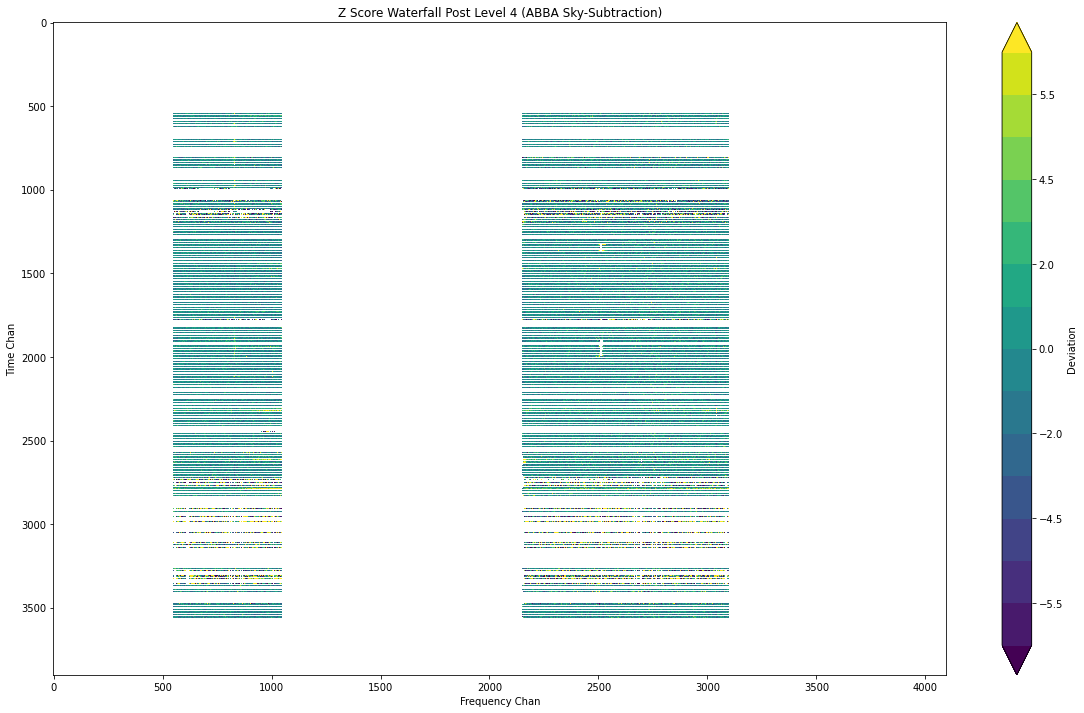

In [403]:
bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Post Level 4 (ABBA Sky-Subtraction)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation' )

# Histogram plot of the ABBA Z Score Post Level 4

In [328]:
mask_l4 = stacked_flags(l4_flags_dict)

In [329]:
print(f'Z map data shape:{z_score_map_abba.shape}')
print(f'L4 mask data shape:{mask_l4.shape}')

#Shapes of the z map and mask_l4 are different, i have reshaped the masked_l4 array to match the z map data

Z map data shape:(3902, 4096)
L4 mask data shape:(3905, 4096)


In [330]:
z_data_shape = zscore_l4.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [331]:
z_map_abba_l4_masked = np.ma.masked_array(z_score_map_abba, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall Post Level 1  + level 4 Mask (Applied on the Z-score map of Post Level 1 )'}, xlabel='Frequency Chan', ylabel='Time Chan'>

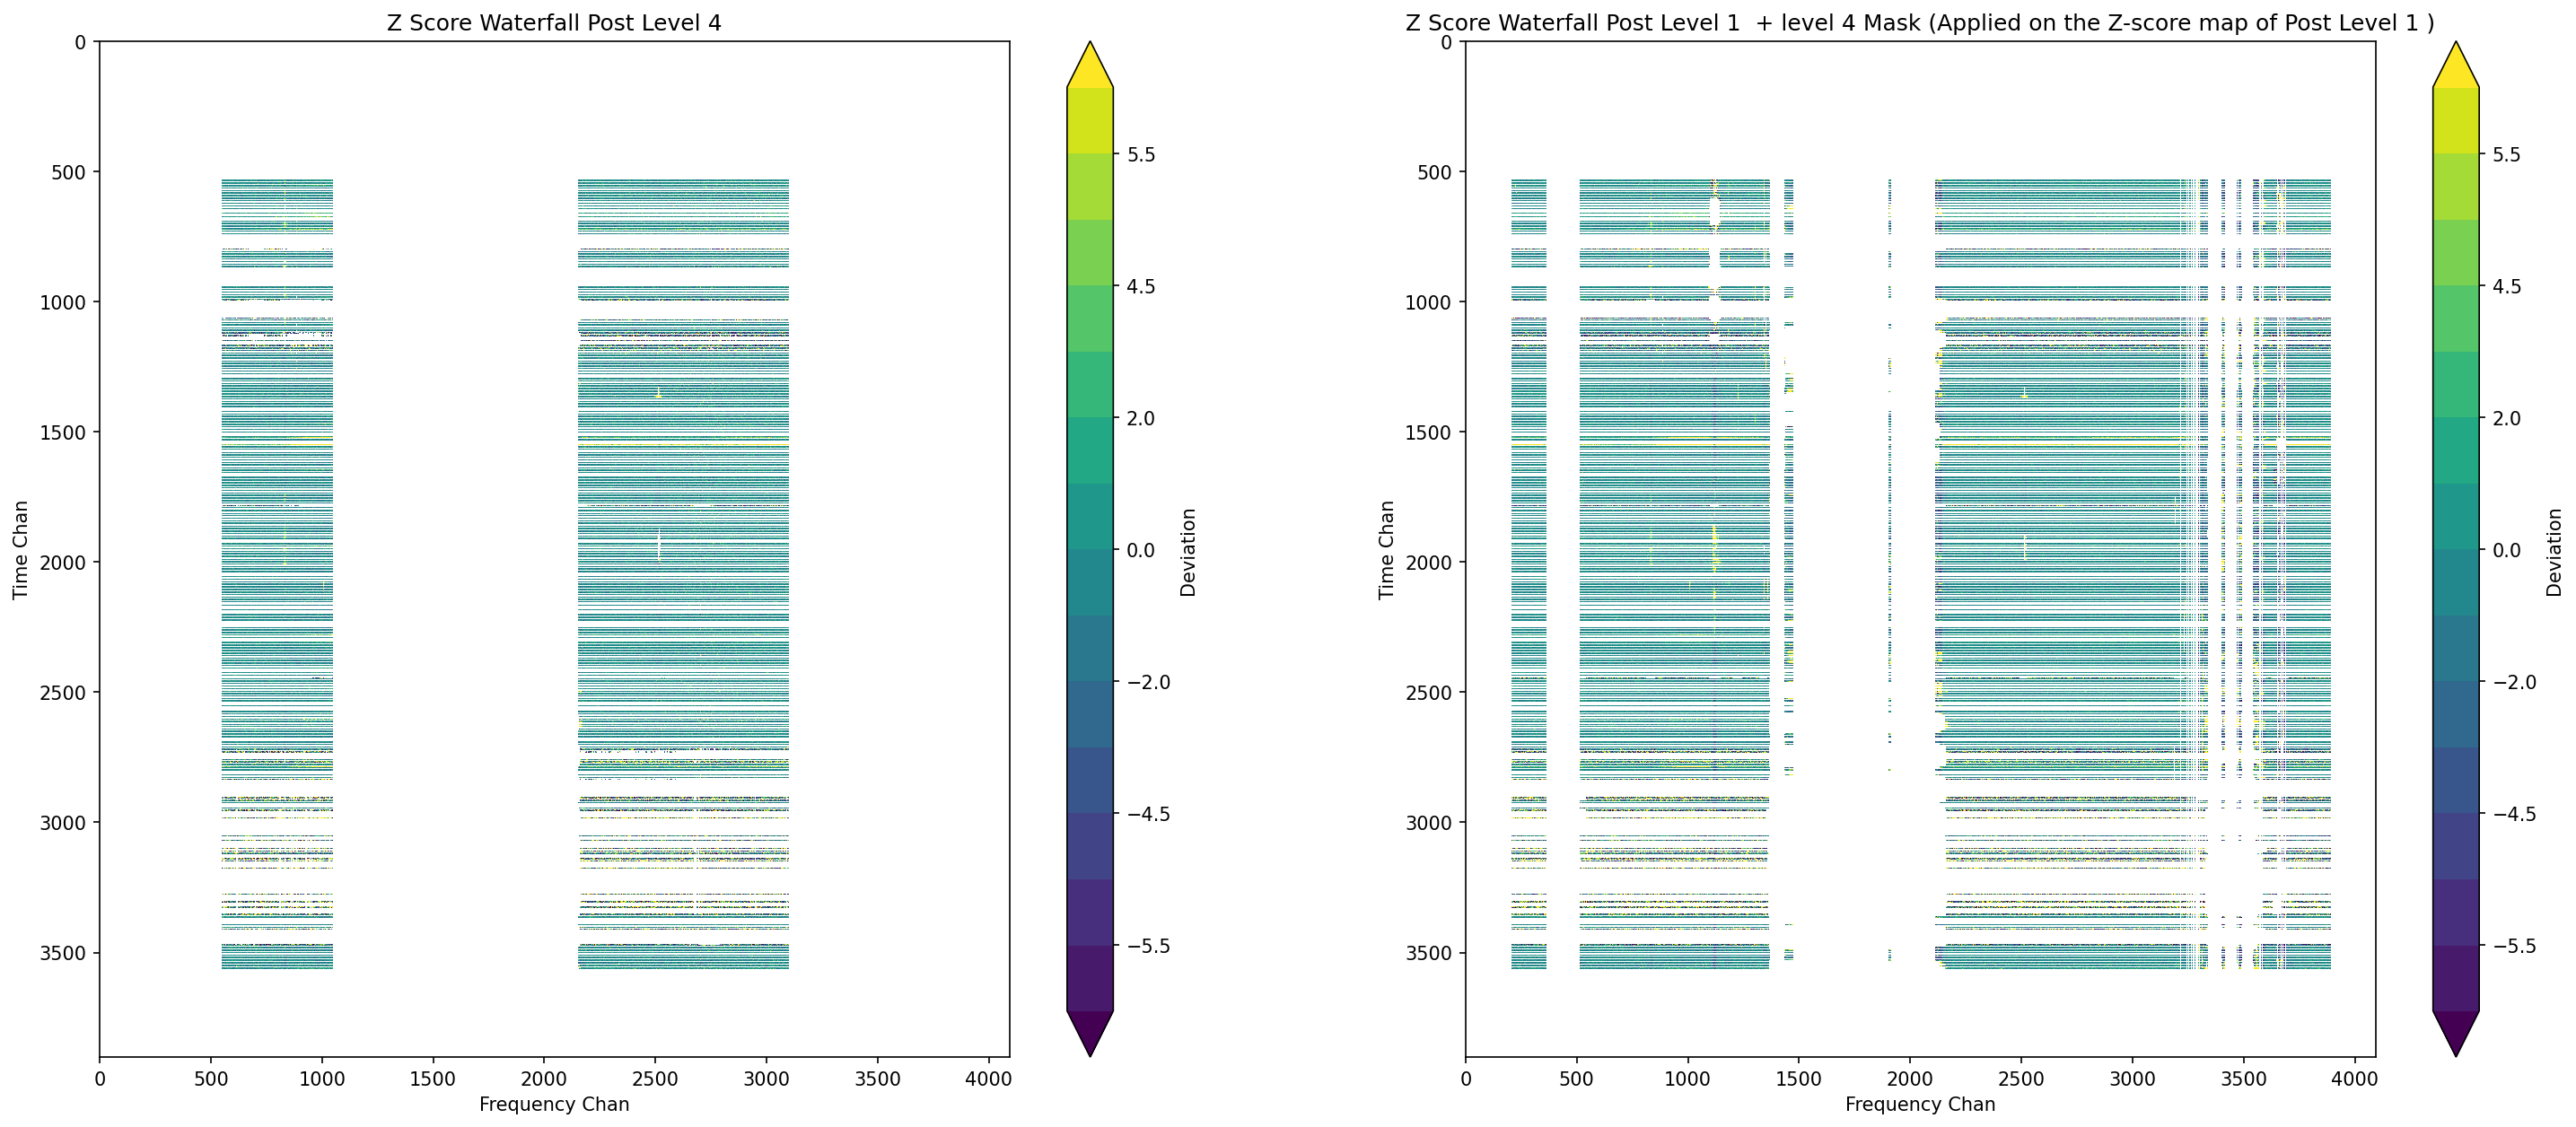

In [332]:
figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)


bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Post Level 4', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[0])
plot_waterfall(z_map_abba_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Post Level 1  + level 4 Mask (Applied on the Z-score map of Post Level 1 )', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[1])

# Summary Result Post Level 4


No handles with labels found to put in legend.


(-12.0, 15.0)

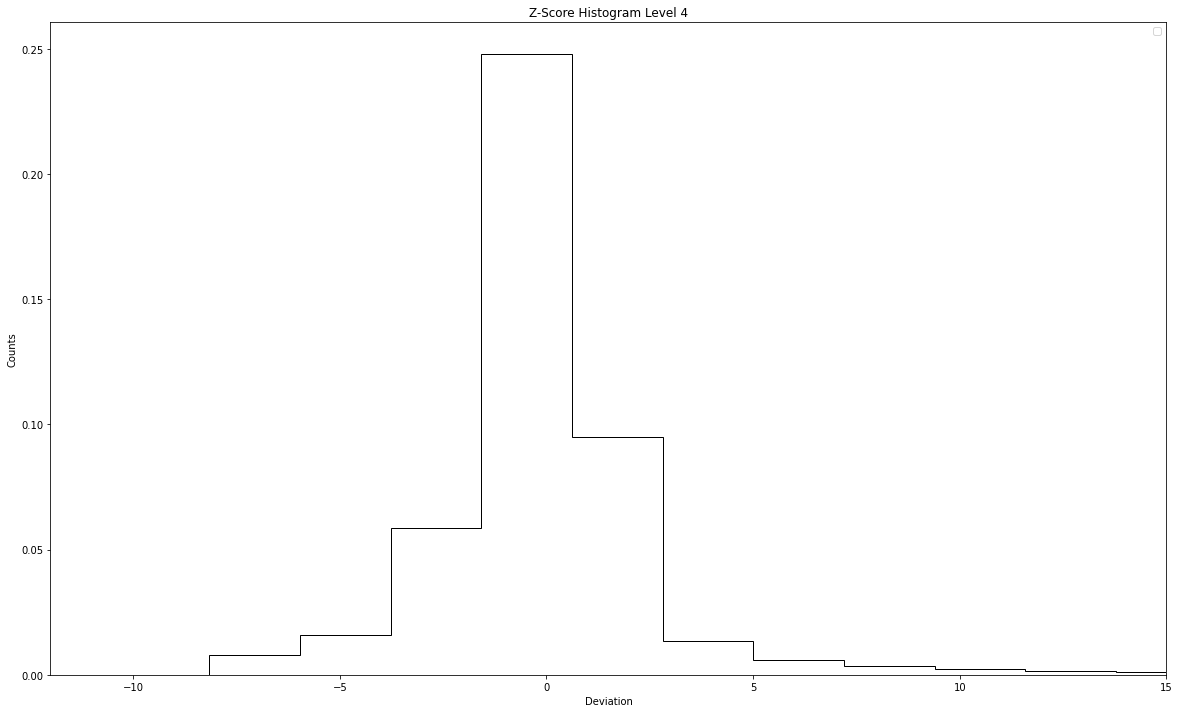

In [333]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(20, 12))


plot_hist(np.ravel(z_map_abba_l4_masked), Title=f'Z-Score Histogram Level 4', bins=500, xlim=(-10, 10), figsize=(20,12), histtype='step', density=True, xlabel='Deviation', ylabel='Counts', ax=ax)
#ax.plot(bin_edges[:-1], model_y)
ax.set_xlim(-12,15)
#ax.set_ylim([np.amin(counts[counts > 0])*1e-3, np.amax(counts)]*1e-3)
    

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(20, 12))


plot_hist(np.ravel(z_map_abba_l4_masked), Title=f'Z-Score Histogram Level 4', bins=500, xlim=(-10, 10), figsize=(20,12), histtype='step', density=True, xlabel='Deviation', ylabel='Counts', ax=ax, label='Level 4 Z-Score')
plot_hist(np.ravel(z_score_map_abba), Title='Z-Score Histogram Level 1 and Level 4', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=True, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r', label='Level 1 Z-Score')
#ax.plot(bin_edges[:-1], model_y)
ax.set_xlim(-12,15)
#ax.set_ylim([np.amin(counts[counts > 0])*1e-3, np.amax(counts)]*1e-3)
    

### Discrete plot of SSINS Flags Post Level 4, Pipeline Flags and Unflagged Data

In [335]:
len(ants)

38

<AxesSubplot:title={'center':'Level 4 Pipeline Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

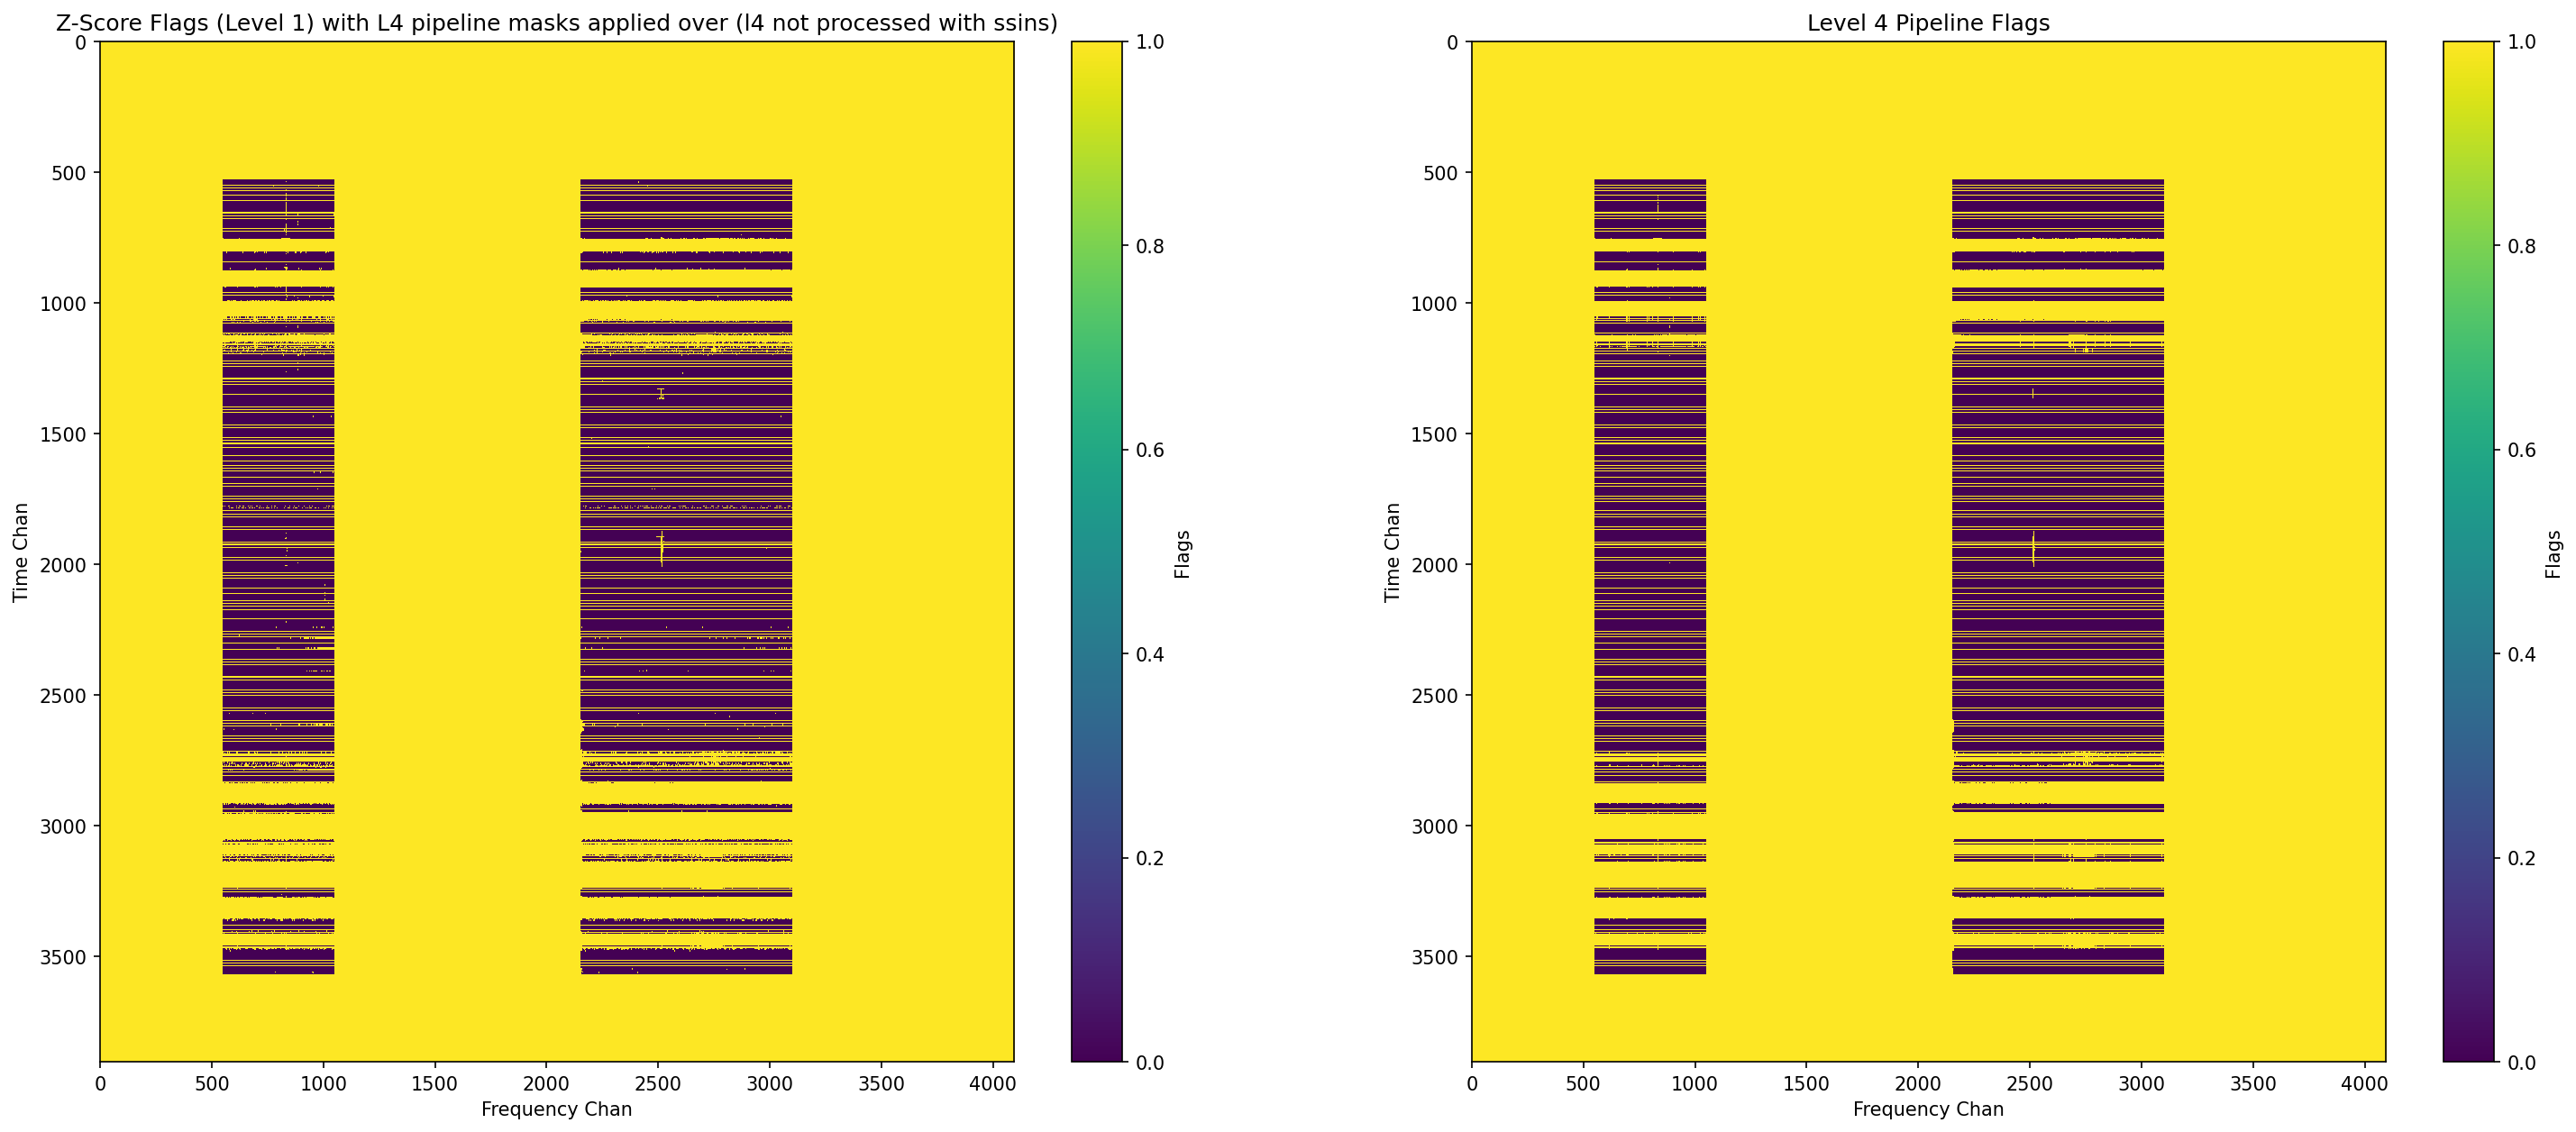

In [337]:
ssins_l4_zscore = cal_zscore(ss_l4) 

ssins_l4_zscore_mask = ((ssins_l4_zscore.astype(float) < -4.5) ^ (ssins_l4_zscore.astype(float) > 4.5) )

masks_l4 = stacked_flags(l4_flags_dict, ants)

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150) #correct stacked + summed receiver masks that matches the z-score
 
plot_waterfall(np.logical_or(z_score_flags, masks_l4), Title = 'Z-Score Flags (Level 1) with L4 pipeline masks applied over (l4 not processed with ssins)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(masks_l4, Title = 'Level 4 Pipeline Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[1]) 

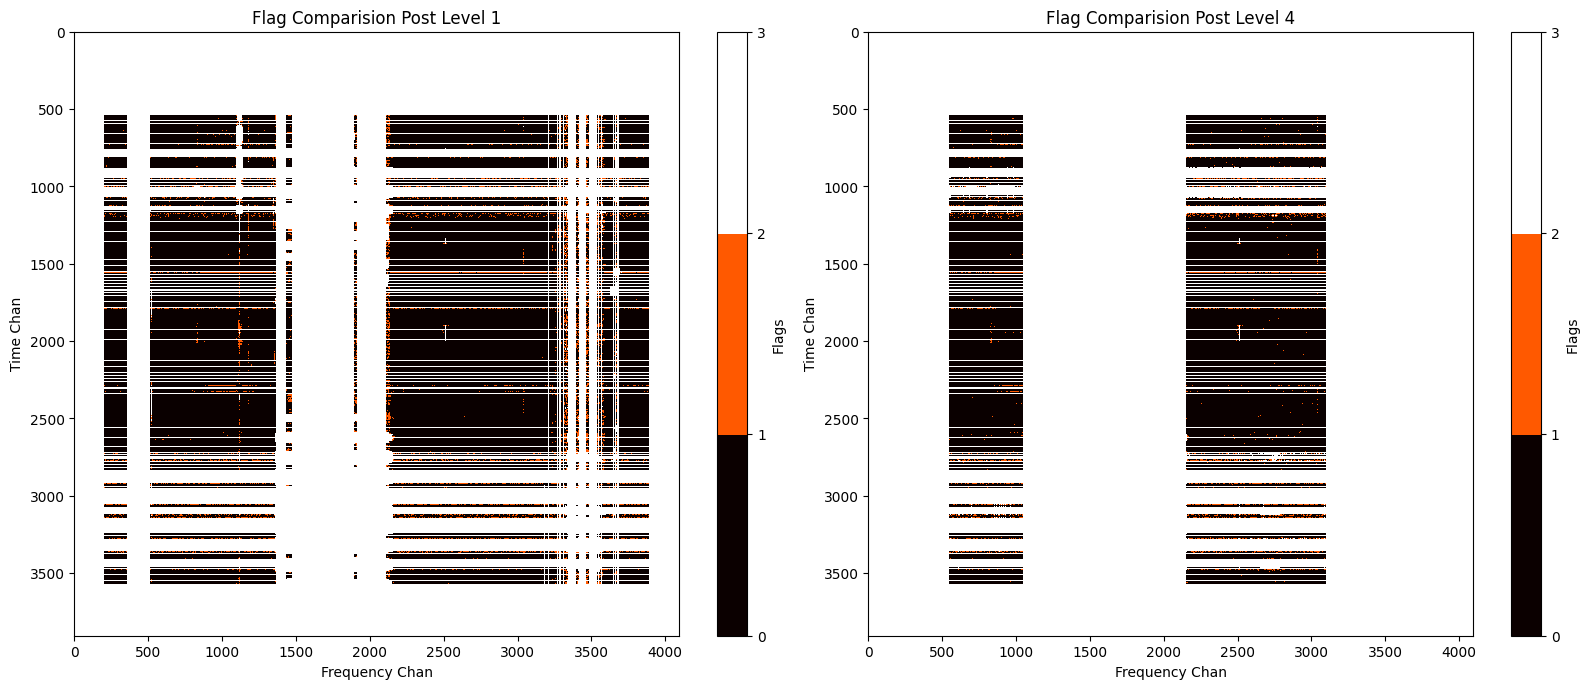

In [408]:
ssins_l4_flags = mask_to_flags(nd_s0, ants=ants, zscore_mask=ssins_l4_zscore_mask)
ssins_l4 = np.logical_or(ssins_l4_flags, pipeline_flags(nd_s0 =nd_s0, ants=ants, pipeline=l4_flags_dict,nd_flags=nd_flags_dict))
s = ssins_l4.astype(int) 

pipline_flags_l4 = pipeline_flags(nd_s0=nd_s0, ants=ants, pipeline=l4_flags_dict,nd_flags=nd_flags_dict)
nd_flags = stacked_flags(nd_flags_dict, ants=ants)

both = ssins_l4.astype(int) +  pipline_flags_l4.astype(int)


from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
cmap = mpl.cm.hot
bounds =[0, 1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plot_waterfall(pipline_flags_l1.astype(int) + ssinsall.astype(int), Title = 'Flag Comparision Post Level 1', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', norm=norm, cmap=cmap, ax=ax[0])
plot_waterfall(pipline_flags_l4.astype(int) + ssins_l4.astype(int), Title = 'Flag Comparision Post Level 4', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', cmap=cmap, norm=norm, ax=ax[1]) 
plt.subplots_adjust(hspace=0.1, wspace=0.05)
plt.savefig('discrete_ssins_flags.png')

## SSINS Algorithm (L4)
In this test we will create the SSINS flags by using the L4 flags from the pipeline only 

### SSINS Post Level 4 Complete Flagging

In this section we apply the thresholding on SSINS Post Level 4 Flags, this is done to flag all time and frequency that is above a threshold we specified. However what i did notice is that SSINS has flagged some data, but hardly any to take a proper threshold i.e (at this level ssins did not find > 30% contatminates across T/F channels)

* Possibly can specify a band to get a proper ratio of the ssins flagged data in a channel.

In [ ]:
ssins_l4_complete_flags = mask_all_fchan_tchan(z_flags=ssins_l4_flags, c_f=0.45, c_t=0.4)

In [ ]:

ssins_l4 = np.logical_or(ssins_l4_complete_flags, pipeline_flags(nd_s0=nd_s0, pipeline=l4_flags_dict,nd_flags=nd_flags_dict))
s = ssins_l4.astype(int) 

pipline_flags_l4 = pipeline_flags(nd_s0 =nd_s0, pipeline=l4_flags_dict,nd_flags=nd_flags_dict)
nd_flags = stacked_flags(nd_flags_dict)

both = ssins_l4.astype(int) +  pipline_flags_l4.astype(int)

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=100)
cmap = mpl.cm.jet
bounds =[0, 1, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(pipline_flags_l4.astype(int) + ssins_l4.astype(int), Title = 'Flag Comparision Post Level 4 Complete Flags' , figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', norm=norm, ax=ax) 


# **1.6.  Sky-Subtraction : 2 Channel Differencing**  <a class="anchor" id="section1.5"></a>

In [ ]:
#After the masking of the data and the flags we apply the sky-subtraction function
SS_dict = {}
for ant_value,(masked_vis) in masked_vis_l1_dict.items():
    # Applying the function to create SkySubtraction
    SS_data = SkySubtraction(masked_vis)
    SS_dict[ant_value] = SS_data


In [ ]:
SS_dict.items()

In [ ]:
ss_vis = np.stack(list(SS_dict.values()), axis=0)

In [ ]:
ss_vis_AllAntsAve = np.nanmean(np.abs(ss_vis[:,:,:]), axis=0)


In [ ]:
ss_vis_AllAntsAve.shape

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

plot_waterfall(ss_vis_AllAntsAve, interpolation='nearest', norm=norm, figsize=(20,12), Title= '2 channel Differencing Noise Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

In [ ]:


fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(ss_vis_AllAntsAve),label= " All Antenna Distribution", Title=f'All Antenna 2-Time Channel Differencing SS Average Residual Distribution', bins=1000, xlim=(-1,3), density=True, figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {np.nanmean(ss_vis_AllAntsAve)}')
ax.legend()

plt.show()

In [ ]:
z_score_map_ss = cal_zscore(ss_vis)

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_score_map_ss, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction) Post Level 1', figsize=(20,12) )

In [ ]:
z_data_shape = z_score_map_ss.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

z_map_ss_l4_masked = np.ma.masked_array(z_score_map_ss, mask=resized_mask_l4, fill_value = np.nan)


In [ ]:

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_map_ss_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask, applied on the level 1 Z-score map', figsize=(20,12) )

In [ ]:
l4_flags_dict.keys()

In [ ]:
ss_l4.shape

In [ ]:
AbbaAllAnts = np.nanmean(ss_l1, axis=0)
td_mean= np.nanmean(ss_vis_AllAntsAve)

fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(ss_vis_AllAntsAve),label= "MeerKLASS-SSINS Amplitudes Distribution 2-Time-Channel Differencing", bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step', xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', color= 'r', ax=ax, density=True)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='k', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : 2-Time-Channel Differencing = {td_mean}')
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_hist(np.ravel(AbbaAllAnts),label= "MeerKLASS-SSINS Amplitudes Distribution ABBA", Title=f'MK-SSINS Amplitude Distribution,Sky-Subtraction Method Comparisions', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', density=True, ylabel='Counts', edgecolor='r',  ax=ax)
ax.axvline(np.nanmean(AbbaAllAnts), color='b', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : ABBA= {np.nanmean(AbbaAllAnts)}')
ax.legend()
ax.set_ylim(top=6)

plt.show()

In [ ]:
# In the above plot we see that level 1 SSINS picked up more possible RFI as compared to the level 4 pipeline flags

In [ ]:
#compare what ssins al finds that level 4 flags didnt pick up
# compare what ssins finds after l4
# compare what ssins finds after l1+l4

In [ ]:
# make plots of the raw, noise and z score for abba 
#make plot of the raw, noise and z score for abba 

#make plot of pipeline flags, and then with ssins additional flags not on the raw data

In [418]:
import katcali 
fname=Block

data=kio.load_data(fname)

In [419]:
freqs = data.channel_freqs
freqs/1e6

array([ 856.        ,  856.20898438,  856.41796875, ..., 1711.37304688,
       1711.58203125, 1711.79101562])

In [420]:
chans = data.channels
chans

array([   0,    1,    2, ..., 4093, 4094, 4095])

In [421]:
times = data.timestamps
times

array([1.63838631e+09, 1.63838631e+09, 1.63838632e+09, ...,
       1.63839411e+09, 1.63839411e+09, 1.63839412e+09])

In [422]:
time_dumps = data.dumps
time_dumps

array([   0,    1,    2, ..., 3902, 3903, 3904])

In [423]:
ssins_only_l1 = mask_to_flags(nd_s0 = nd_s0, ants=ants, zscore_mask = zscore_l1_mask)

In [424]:
fname

'1638386189'

In [427]:
directory = 'SSINS_Flags/ssins_level1/'
file_path = os.path.join(directory, f'{fname}_{pol}_ssins_Level1_flags.npy')

# Save the file
with open(file_path, 'wb') as f:
    np.save(f, ssins_only_l1)


In [429]:
ssins_only_l4 = mask_to_flags(nd_s0 = nd_s0, ants=ants, zscore_mask= ssins_l4_zscore_mask)

In [430]:
ssins_only_l4.shape

(3905, 4096)

In [ ]:

directory = 'SSINS_Flags/ssins_level4/'
file_path = os.path.join(directory, f'{fname}_{pol}_ssins_Level4_flags.npy')

# Save the file
with open(file_path, 'wb') as f:
    np.save(f, ssins_only_l4)

In [ ]:

"""
ssins_flags =  mask_to_flags(nd_s0, ants=ants, zscore_mask=zscore_l1_mask, pipeline_flags=l1_flags_dict, nd_flags=nd_flags_dict)
data = masked_vis_l1_dict['m000']
data_with_ssins_flags = np.ma.array(data.data, mask=ssins_flags)
per_receiver = np.logical_or(ssins_flags, data.mask)
data_with_ssins_flags_and_per_receiver_flags = np.ma.array(data.data, mask=per_receiver) # note the local is the union of the global ssins and the additional flags on the reciever m000 that may have been summed out (not within the global score) in the ssins algorithm

global_ssins_flags  = mask_all_fchan_tchan(z_flags= ssins_flags, c_f=0.5, c_t=0.5)
local_ssins_flags = mask_all_fchan_tchan(z_flags=data_with_ssins_flags_and_per_receiver_flags.mask, c_f=0.5, c_t=0.5)



plot_waterfall(per_receiver, interpolation='nearest') # this is per receiver flags

per_receiver_ssins_flags = mask_all_fchan_tchan(z_flags=data_with_ssins_flags_and_per_receiver_flags.mask, c_f=0.5, c_t=0.5) # this is ssins complete flagging for reciever m000
plot_waterfall(per_receiver_ssins_flags, interpolation='nearest')

all_receiver_ssins_flags  = mask_all_fchan_tchan(z_flags= ssins_flags, c_f=0.5, c_t=0.5) # this is ssins complete global flagging across all recievers
plot_waterfall(all_receiver_ssins_flags, interpolation='nearest')

"""

## **Bandpass plots of applying ssins local and global flags** <a id="section.bp"></a>

In [ ]:
"""
figure, ax = plt.subplots(3, 1 , figsize=(24, 6), sharex=True, dpi=150)
figure.suptitle('Bandpass m000 - This Shows we need to do thresholding per receiver to get a cleaner bandpass')

plot_x_y(chans, np.nanmean(raw_vis_dict['m000'], axis=0), ax=ax[0], label = 'Raw Visibility',  ylabel='Signal Amplitudes')
plot_x_y(chans, np.nanmean(masked_vis_l1_dict['m000'], axis=0), ax=ax[1], label = 'Raw Visibility + Level 1 Flags',  ylabel='Signal Amplitudes')
plot_x_y(chans, np.nanmean((data_with_ssins_flags), axis=0), ax=ax[2], label = 'Raw Visibility + SSINS Flags Post Level 1')
plt.show()

figure, ax = plt.subplots(3, 1 , figsize=(24, 6), sharex=True, dpi=150)
figure.suptitle('Bandpass m000 -  Zoom: (1000-1500)')
plot_x_y(chans, y =np.mean(masked_vis_l1_dict['m000'], axis=0), ax=ax[0], label = 'Raw Visibility + Level 1 Flags', xlabel='Frequency Chans', ylabel='Signal Amplitudes', xlim=(1000, 1500), ylim=(240, 280))
plot_x_y(chans, y = np.nanmean(data_with_ssins_flags, axis=0), ax=ax[1], label = 'Raw Visibility + Post Level 1 SSINS Flags', xlim=(1000, 1500), ylim=(240, 280))
plot_x_y(chans, y = (np.mean(masked_vis_l1_dict['m000'], axis=0) - np.nanmean((data_with_ssins_flags), axis=0)), label = 'Residual Bandpass', xlim=(1000, 1500), ax=ax[2])


data = masked_vis_l1_dict['m000']
data_with_ssins_flags = np.ma.array(data.data, mask=ssins_flags)
data_new = data_with_ssins_flags.copy()
local_flags  = mask_all_fchan_tchan(z_flags= data_new.mask, c_f=0.5, c_t=0.5)
global_flags = mask_all_fchan_tchan(z_flags=z_score_flags, c_f=0.5, c_t=0.5)

figure, ax = plt.subplots(1, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
m000_data_with_all_flags = np.ma.array(data_new.data, mask =local_ssins_flags)
plot_x_y(chans, y =np.mean(masked_vis_l1_dict['m000'], axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax, label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')


figure, ax = plt.subplots(1, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
m000_data_with_all_flags = np.ma.array(data_new.data, mask = local_ssins_flags)
global_flags = mask_all_fchan_tchan(z_flags=z_score_flags, c_f=0.5, c_t=0.4)
m000_data_with_global_ssins_flags= np.ma.array(data.data, mask = global_ssins_flags)
plot_x_y(chans, y =np.mean(data, axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax, label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')
plot_x_y(chans, y = np.nanmean((m000_data_with_global_ssins_flags), axis=0), ax=ax, label = 'Raw Visibility + Post  Level 1 SSINS Flags - Global Thresholding (> 40% T_chan Flagging, > 50% F_chan Flagging)')

figure, ax = plt.subplots(1, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
m000_data_with_all_flags = np.ma.array(data_new.data, mask = local_ssins_flags)
m000_data_with_global_ssins_flags= np.ma.array(data.data, mask = global_ssins_flags)
#plot_x_y(chans, y =np.mean(data, axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax, label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 40% T_chan Flagging, > 50% F_chan Flagging)')
plot_x_y(chans, y = np.nanmean((m000_data_with_global_ssins_flags), axis=0), ax=ax, label = 'Raw Visibility + Post  Level 1 SSINS Flags - Global Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')

figure, ax = plt.subplots(2, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
data_new = data_with_ssins_flags.copy()
data_new_all_flags  = mask_all_fchan_tchan(z_flags= data_new.mask, c_f=0.5, c_t=0.5)
z_flags_new = mask_all_fchan_tchan(z_flags=z_score_flags, c_f=0.5, c_t=0.4)
m000_data_with_all_flags = np.ma.array(data_new.data, mask = local_ssins_flags)
m000_data_with_global_ssins_flags= np.ma.array(data.data, mask = global_ssins_flags)
#plot_x_y(chans, y =np.mean(data, axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax[0], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 40% T_chan Flagging, > 50% F_chan Flagging)')
plot_x_y(chans, y = np.nanmean((m000_data_with_global_ssins_flags), axis=0), ax=ax[1], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Global Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')

figure, ax = plt.subplots(2, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
data_new = data_with_ssins_flags.copy()
local_ssins_flags_on_m000  = mask_all_fchan_tchan(z_flags= data_new.mask, c_f=0.5, c_t=0.5)
global_complete_ssins_flags = mask_all_fchan_tchan(z_flags=z_score_flags, c_f=0.5, c_t=0.5)
m000_data_with_all_flags = np.ma.array(data_new.data, mask = np.logical_or(data_new.mask, local_ssins_flags_on_m000))
m000_data_with_global_ssins_flags= np.ma.array(data.data, mask = np.logical_or(data.mask, z_flags_new))
#plot_x_y(chans, y =np.mean(data, axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax[0], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')
plot_x_y(chans, y = np.nanmean((m000_data_with_global_ssins_flags), axis=0), ax=ax[1], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Global Thresholding (> 50% T_chan Flagging, > 50% F_chan Flagging)')

figure, ax = plt.subplots(2, 1 , figsize=(24, 6), dpi=150)
figure.subplots_adjust(hspace=0.8)
data = masked_vis_l1_dict['m000']
data_new = data_with_ssins_flags.copy()
data_new_all_flags  = mask_all_fchan_tchan(z_flags= data_new.mask, c_f=0.45, c_t=0.45)
z_flags_new = mask_all_fchan_tchan(z_flags=z_score_flags, c_f=0.45, c_t=0.45)
m000_data_with_all_flags = np.ma.array(data_new.data, mask = np.logical_or(data_new.mask, data_new_all_flags))
m000_data_with_global_ssins_flags= np.ma.array(data.data, mask = np.logical_or(data.mask, z_flags_new))
#plot_x_y(chans, y =np.mean(data, axis=0), ax=ax, Title = 'm000 Bandpass', label = 'Raw Visibility + Level 1 Flags')
plot_x_y(chans, y = np.nanmean((m000_data_with_all_flags), axis=0), ax=ax[0], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Local Thresholding (> 45% T_chan Flagging, > 45% F_chan Flagging)')
plot_x_y(chans, y = np.nanmean((m000_data_with_global_ssins_flags), axis=0), ax=ax[1], label = 'Raw Visibility + Post  Level 1 SSINS Flags - Global Thresholding (> 45% T_chan Flagging, > 45% F_chan Flagging)')

# **RFI Statistics - Flagging Percentages** 

In [ ]:
int(True)

In [ ]:
int(False)

In [433]:
# Function to create the 3D array to sum accurately the occurance of RFI accross the channels.
l1_flags = dict_to_array(l1_flags_dict)

In [434]:
l4_flags = dict_to_array(l4_flags_dict)

In [435]:
l4_flags.shape

(38, 3905, 4096)

In [436]:
ssins_only_l4.shape

(3905, 4096)

In [437]:
def count_flags(flag, flag_extra=None, nreceiver=None): 
    flag_counts = {}
    if flag_extra is None and flag.ndim == 3:
        
        flags_fchan = 100*(np.sum(flag, axis=(0,1))/(flag.shape[1]*flag.shape[0]))
        flags_tchan = 100*(np.sum(flag, axis=(0,2))/(flag.shape[2]*flag.shape[0]))
        flag_counts = {'flags_fchan': flags_fchan, 'flags_tchan': flags_tchan}
        
    elif flag_extra is not None and nreceiver is not None:
        if flag_extra.ndim == 2:
            flag_3D = np.tile(flag_extra[np.newaxis, :, :], (nreceiver, 1, 1)) # Expand flag to 3D with nreceiver
            flag_combined = np.logical_or(flag_3D, flag)
            flags_fchan = 100*(np.sum(flag_combined, axis=(0,1))/(flag_combined.shape[1]*flag_combined.shape[0]))
            flags_tchan = 100*(np.sum(flag_combined, axis=(0,2))/(flag_combined.shape[2]*flag_combined.shape[0]))  
            flag_counts = {'flags_fchan': flags_fchan, 'flags_tchan': flags_tchan}
        
    elif flag.ndim == 2 and nreceiver is not None:
        flag_3D = np.tile(flag[np.newaxis, :, :], (nreceiver, 1, 1)) # Expand flag to 3D with nreceiver
        flag_combined = np.logical_or(flag_3D, flag)
        flags_fchan = 100*(np.sum(flag_combined, axis=(0,1))/(flag_combined.shape[1]*flag_combined.shape[0]))
        flags_tchan = 100*(np.sum(flag_combined, axis=(0,2))/(flag_combined.shape[2]*flag_combined.shape[0]))  
        flag_counts = {'flags_fchan': flags_fchan, 'flags_tchan': flags_tchan}
        
        
    else:
        raise Exception('nreceiver is required') # raise error that nreceiver is required


    return flag_counts


In [438]:
katcali_flag_counts_l1 = count_flags(dict_to_array(l1_flags_dict))

In [439]:
katcali_flag_counts_l4 = count_flags(dict_to_array(l4_flags_dict))

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [442]:
ssins_flag_counts_l1 = count_flags(dict_to_array(l1_flags_dict), flag_extra=ssins_only_l1, nreceiver = len(ants))

In [443]:
ssins_flag_counts_l4 = count_flags(dict_to_array(l4_flags_dict), flag_extra=ssins_only_l4, nreceiver = len(ants))

In [444]:
ssins_only_flag_counts_l1 = count_flags(flag = ssins_only_l1, nreceiver=len(ants))

In [445]:
ssins_only_flag_counts_l4 = count_flags(flag = ssins_only_l4, nreceiver=len(ants))

In [446]:
ssins_flag_counts_l1['flags_fchan'].shape

(4096,)

In [447]:
linewidth=4

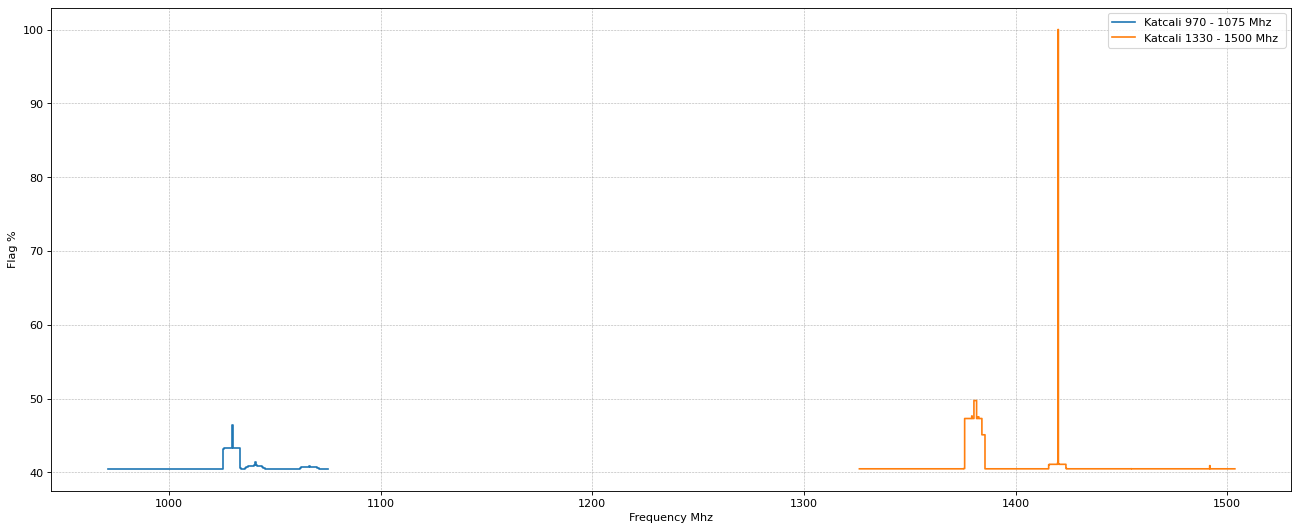

In [448]:
plt.figure(figsize=(20,8),dpi=80)
plt.step(freqs[chans[550:1050]]/1e6, katcali_flag_counts_l1['flags_fchan'][550:1050], label='Katcali 970 - 1075 Mhz')
plt.step(freqs[chans[2250:3100]]/1e6, katcali_flag_counts_l1['flags_fchan'][2250:3100], label='Katcali 1330 - 1500 Mhz ')
plt.grid(ls= ':', color='#6e6e6e', lw=0.5)
plt.xlabel('Frequency Mhz')
plt.ylabel('Flag %')
plt.legend()


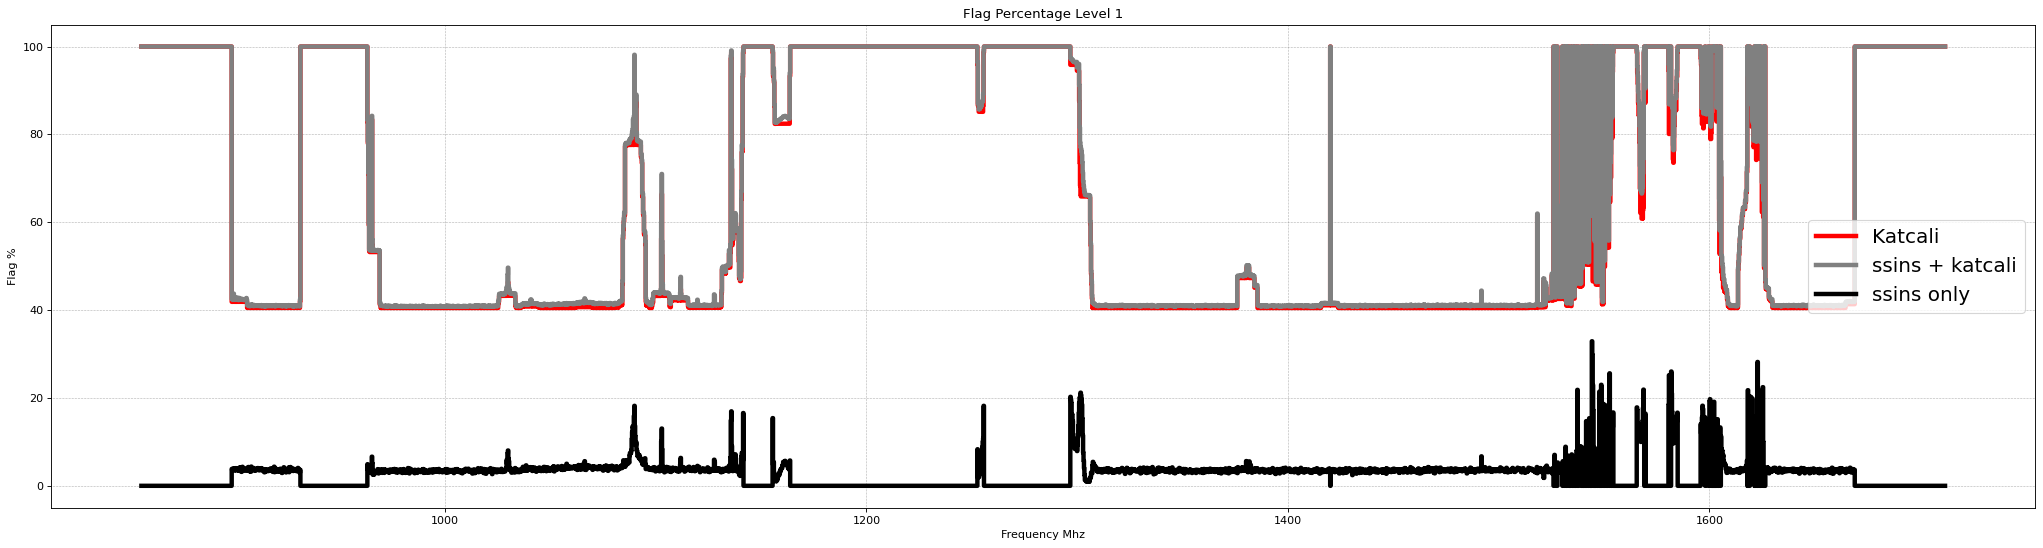

In [449]:
plt.figure(figsize=(32,8),dpi=80)

plt.step(freqs[chans]/1e6, katcali_flag_counts_l1['flags_fchan'], label='Katcali', color='r', linewidth=linewidth)
plt.step(freqs[chans]/1e6, ssins_flag_counts_l1['flags_fchan'], label='ssins + katcali', color='grey', linewidth=linewidth)
plt.step(freqs[chans]/1e6, ssins_only_flag_counts_l1['flags_fchan'], label='ssins only', color='k', linewidth=linewidth)
plt.grid(ls= ':', color='#6e6e6e', lw=0.5)
plt.xlabel('Frequency Mhz')
plt.ylabel('Flag %')
plt.title('Flag Percentage Level 1')
plt.legend(fontsize=18)


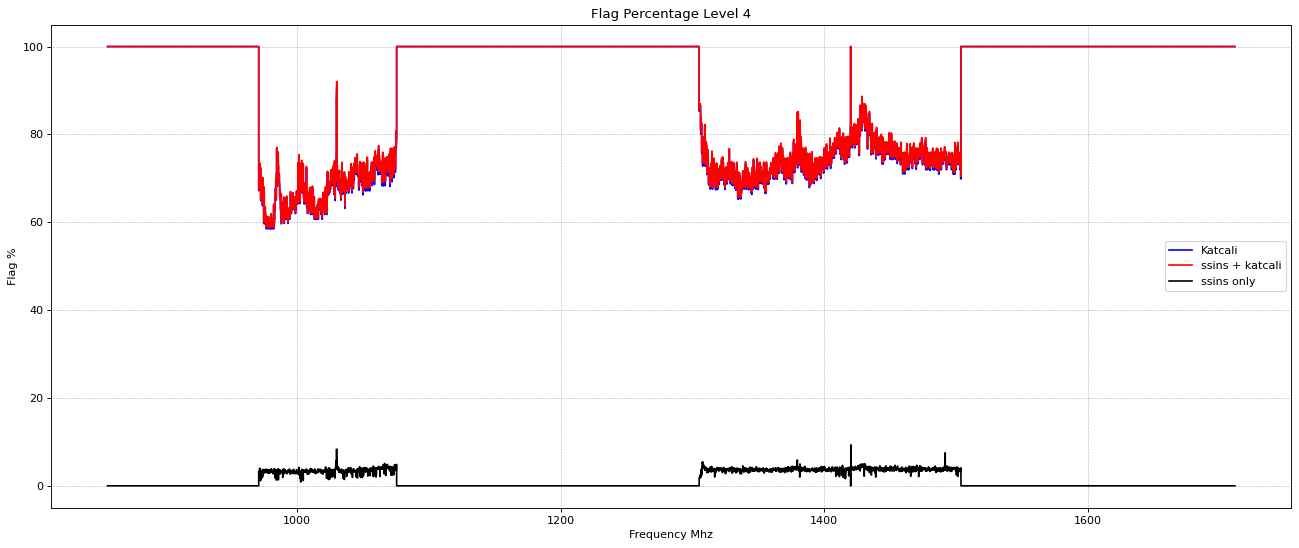

In [450]:
plt.figure(figsize=(20,8),dpi=80)

plt.step(freqs[chans]/1e6, katcali_flag_counts_l4['flags_fchan'], label='Katcali', color='b')
plt.step(freqs[chans]/1e6, ssins_flag_counts_l4['flags_fchan'], label='ssins + katcali', color='r')
plt.step(freqs[chans]/1e6, ssins_only_flag_counts_l4['flags_fchan'], label='ssins only', color='k')
plt.grid(ls= ':', color='#6e6e6e', lw=0.5)
plt.xlabel('Frequency Mhz')
plt.ylabel('Flag %')
plt.title('Flag Percentage Level 4')
plt.legend()


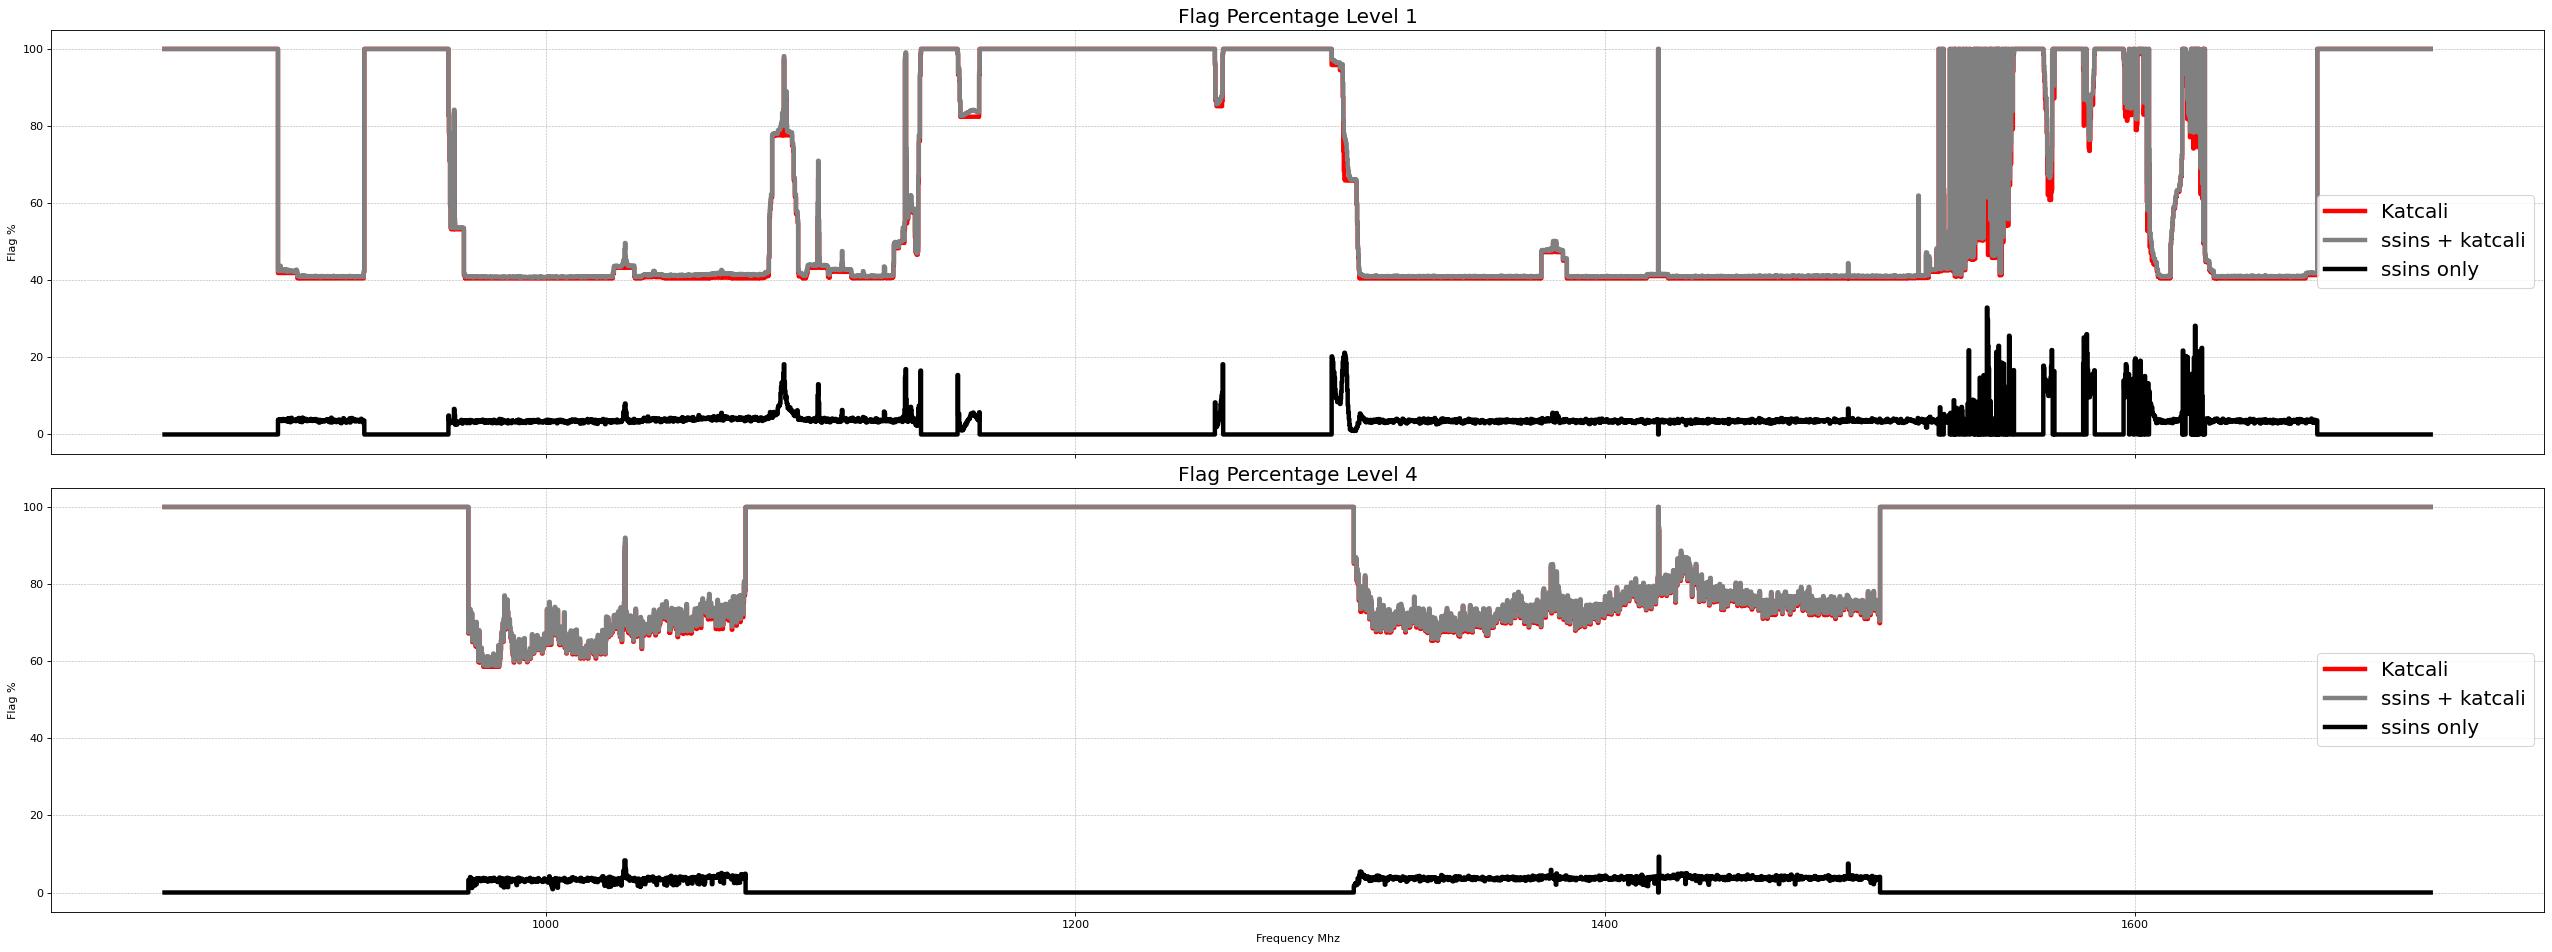

In [451]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(32, 12), dpi=80, sharex=True, sharey=True)

# Plot for Level 1
ax1.step(freqs[chans]/1e6, katcali_flag_counts_l1['flags_fchan'], label='Katcali', color='r', linewidth=linewidth)
ax1.step(freqs[chans]/1e6, ssins_flag_counts_l1['flags_fchan'], label='ssins + katcali', color='grey', linewidth=linewidth)
ax1.step(freqs[chans]/1e6, ssins_only_flag_counts_l1['flags_fchan'], label='ssins only', color='k', linewidth=linewidth)
ax1.grid(ls=':', color='#6e6e6e', lw=0.5)
ax1.set_ylabel('Flag %')
ax1.set_title('Flag Percentage Level 1',  fontsize=18)
ax1.legend(fontsize=18)

# Plot for Level 4
ax2.step(freqs[chans]/1e6, katcali_flag_counts_l4['flags_fchan'], label='Katcali', color='r', linewidth=linewidth)
ax2.step(freqs[chans]/1e6, ssins_flag_counts_l4['flags_fchan'], label='ssins + katcali', color='grey', linewidth=linewidth)
ax2.step(freqs[chans]/1e6, ssins_only_flag_counts_l4['flags_fchan'], label='ssins only', color='k', linewidth=linewidth)
ax2.grid(ls=':', color='#6e6e6e', lw=0.5)
ax2.set_xlabel('Frequency Mhz')
ax2.set_ylabel('Flag %')
ax2.set_title('Flag Percentage Level 4',  fontsize=18)
ax2.legend(fontsize=18)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('flag_percentage.png')
plt.subplots_adjust(hspace=0.08, wspace=0)
plt.show()


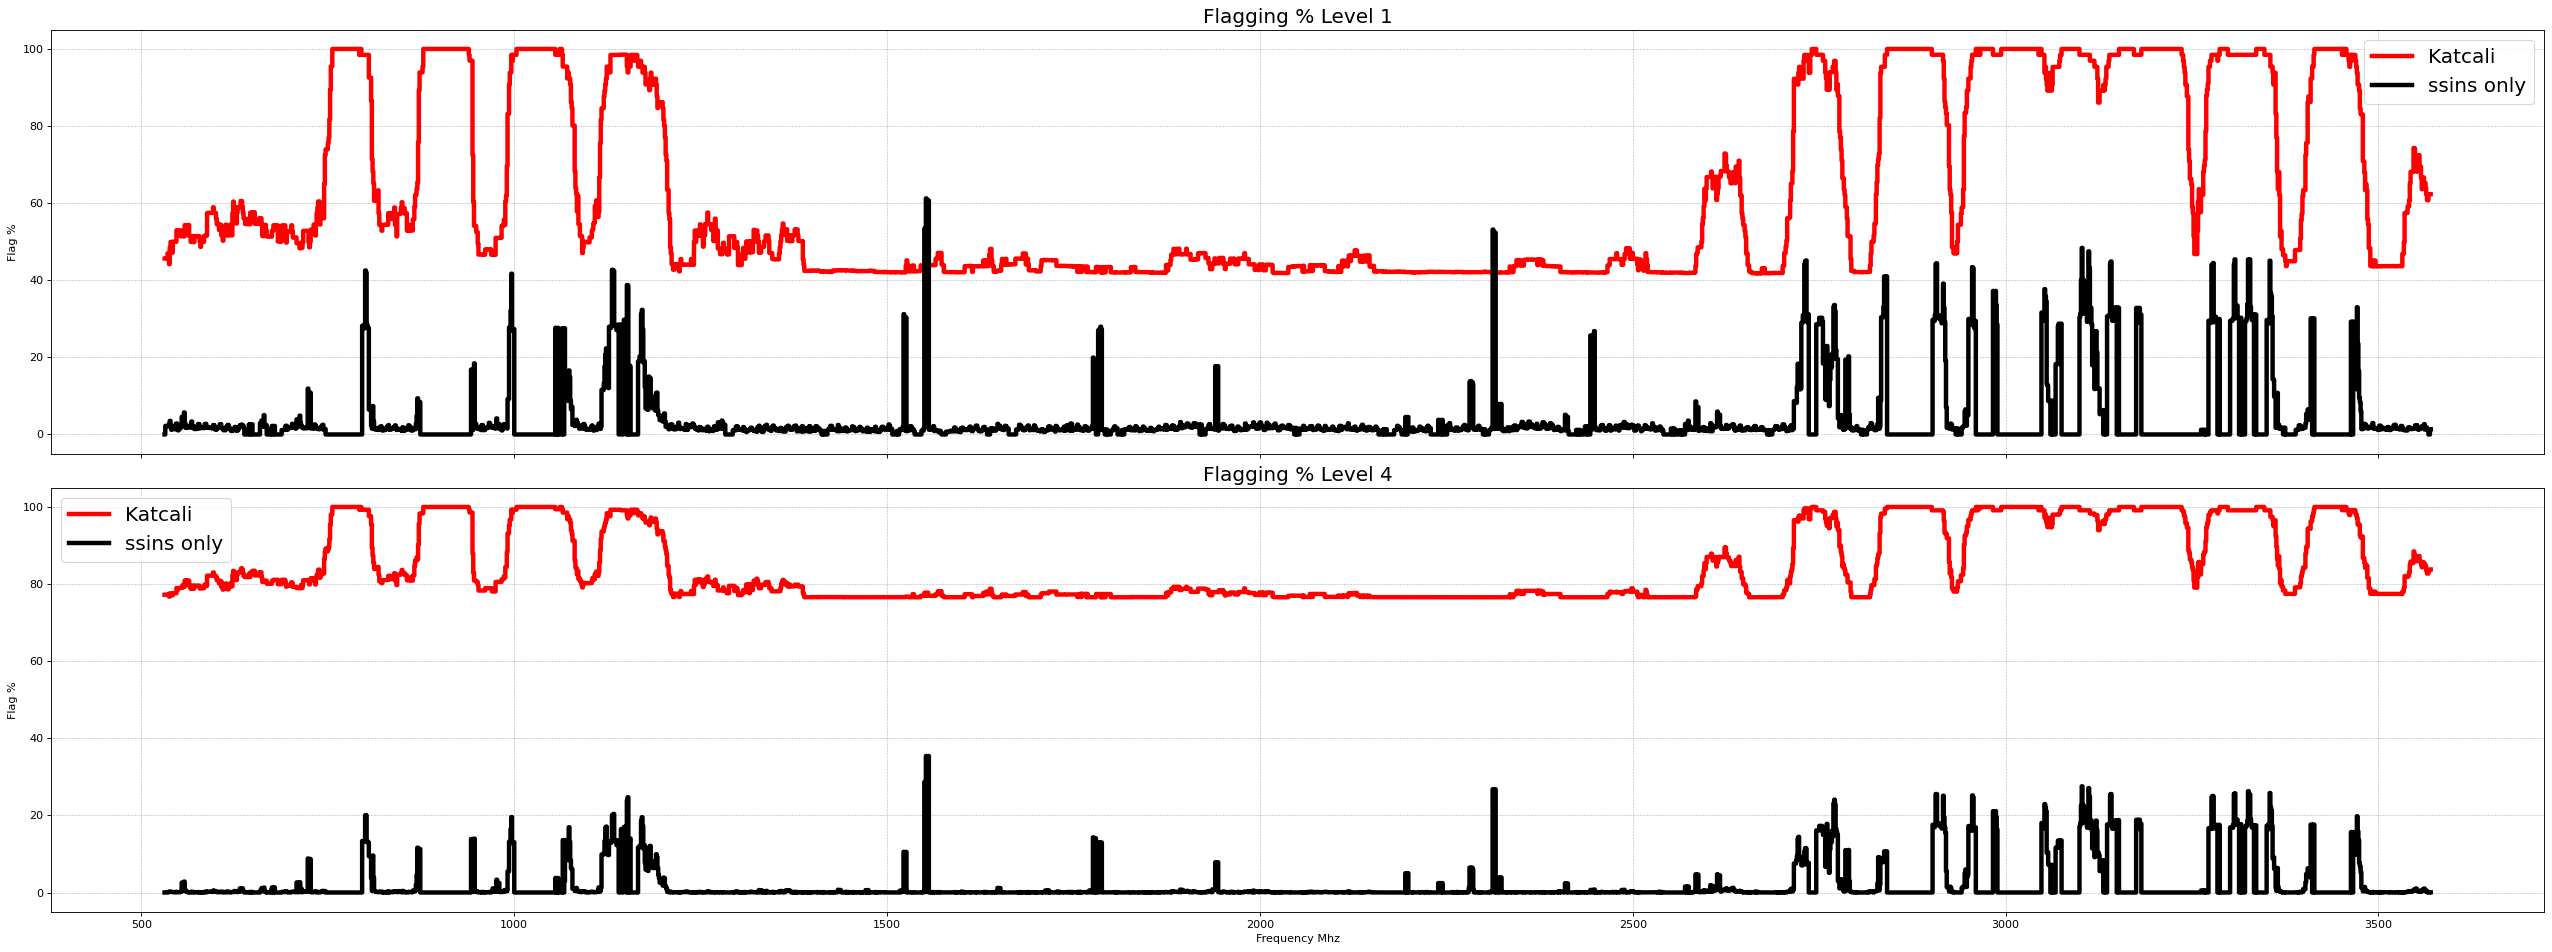

In [452]:
import matplotlib.pyplot as plt

# Define the figure and the two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(32, 12), dpi=80, sharex=True, sharey=True)

# Plot for Level 1
ax1.step(time_dumps[nd_s0], katcali_flag_counts_l1['flags_tchan'][nd_s0], label='Katcali', color='r', linewidth=linewidth)
#ax1.step(time_dumps[nd_s0], ssins_flag_counts_l1['flags_tchan'][nd_s0], label='ssins + katcali', color='grey', linewidth=linewidth)
ax1.step(time_dumps[nd_s0], ssins_only_flag_counts_l1['flags_tchan'][nd_s0], label='ssins only', color='k', linewidth=linewidth)
ax1.grid(ls=':', color='#6e6e6e', lw=0.5)
ax1.set_ylabel('Flag %')
ax1.set_title('Flagging % Level 1',  fontsize=18)
ax1.legend(fontsize=18)

# Plot for Level 4
ax2.step(time_dumps[nd_s0], katcali_flag_counts_l4['flags_tchan'][nd_s0], label='Katcali', color='r', linewidth=linewidth)
#ax2.step(time_dumps[nd_s0], ssins_flag_counts_l4['flags_tchan'][nd_s0], label='ssins + katcali', color='grey', linewidth=linewidth)
ax2.step(time_dumps[nd_s0], ssins_only_flag_counts_l4['flags_tchan'][nd_s0], label='ssins only', color='k', linewidth=linewidth)
ax2.grid(ls=':', color='#6e6e6e', lw=0.5)
ax2.set_xlabel('Frequency Mhz')
ax2.set_ylabel('Flag %')
ax2.set_title('Flagging % Level 4',  fontsize=18)
ax2.legend(fontsize=18)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('flag_percentage.png')
plt.subplots_adjust(hspace=0.08, wspace=0)
plt.show()


In [7]:
"""
def return_unique_block(filename):
    """This Function searches a textfile to return unique values. We use Python set() module to collect unique elemnets from a list.
       Non-repeating element iterable modified as passed as argument."""
    unique_vals = set()
    with open(filename, 'r') as file:
        for line in file:
            
            columns = line.split()
            if columns: 
                unique_vals.add(columns[0]) 
    
    return unique_vals
"""

In [9]:
"""
filename = 'result_level4_list.txt'
unique_first_column = return_unique_block(filename)

# Display the unique values
print("Observation Blocks:")
for value in unique_first_column:
    print(value)
"""

Observation Blocks:
1631667564
1631818149
1638294319
1637699408
1631732038
1637354605
1640799689
1638639082
1634402485
1631982988
1631559762
1631990463
1631810671
1637346562
1639157507
1638130295
1638301944
1631387336
1632760885
1638386189
1634252028
1632077222
1632184922
1630519596
1632069690
1637691677
1633365980
